# Visualization

In this notebook, we will discuss the statistics and insights of the cold start datasets, in addition to the session based recommendation dataset sbr_data_1M in order to understand the data we are using on the models.

## Installations

In [1]:
!pip install matplotlib_venn
!pip install missingno

  Using cached matplotlib_venn-0.11.9-py3-none-any.whl
  Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)


## Imports

In [2]:
# Import
import random
import pandas as pd
import pickle
import numpy as np

import joblib
from pathlib import Path
from tqdm import tqdm
from IPython.core.interactiveshell import InteractiveShell

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from scipy import stats
import scipy.stats as stats
from scipy.stats import skew, norm
from statsmodels.stats.power import TTestIndPower, TTestPower

import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [3]:
# Imports settings

# use the following to suppress scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.width = None

InteractiveShell.ast_node_interactivity = "all"

sns.set_context('talk')
sns.set_style('white')
sns.set()
%matplotlib inline

## Data Exploration

In [59]:
# load each dataset into a dataframe
cold_data = pd.read_csv('Tenrec/cold_data.csv')
cold_data_1 = pd.read_csv('Tenrec/cold_data_1.csv')
cold_data_07 = pd.read_csv('Tenrec/cold_data_0.7.csv')
cold_data_03 = pd.read_csv('Tenrec/cold_data_0.3.csv')
sbr_data_1M = pd.read_csv('Tenrec/sbr_data_1M.csv')

/tmp/ipykernel_9787/2767341369.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  sbr_data_1M = pd.read_csv('Tenrec/sbr_data_1M.csv')


### 1. Cold Start Datasets
In this section, we will describe and analyze the cold start datasets via visuals and numerical statistics. Going through the analysis each of the four files, we found that the statistics of each file are almost similar. Thus, you will find some visuals are not repeated for all datasets.

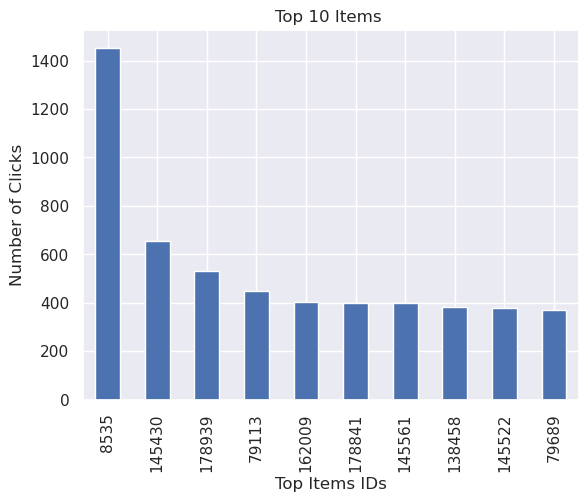

In [64]:
# Calculate the percentage of clicks for each item
click_percentage = cold_data.groupby('item_id')['click'].sum()
top_items = click_percentage.nlargest(10)

# Plot a histogram of the click percentages
x= top_items.plot(kind='bar')
x= plt.xlabel('Top Items IDs')
x= plt.ylabel('Number of Clicks')
x= plt.title('Top 10 Items')
plt.show()

The most popular item in all datasets is "8535".

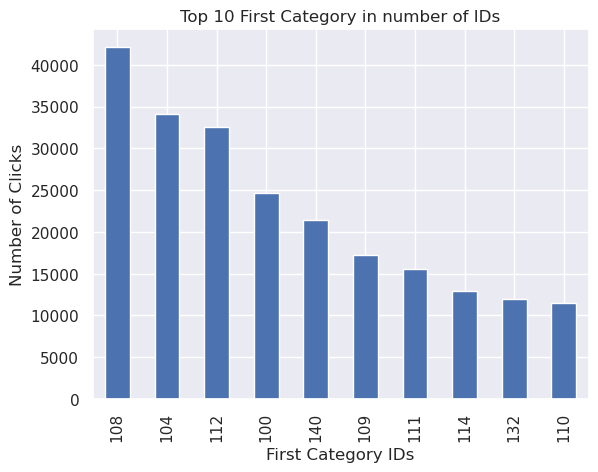

In [65]:
# Calculate the percentage of clicks for each item
click_percentage = cold_data.groupby('category_first')['click'].sum()
# Print the top 10 items with the highest click percentages
top_items = click_percentage.nlargest(10)


# Plot a histogram of the click percentages
x= top_items.plot(kind='bar')
x= plt.xlabel('First Category IDs')
x= plt.ylabel('Number of Clicks')
x= plt.title('Top 10 First Category in number of IDs')
plt.show()


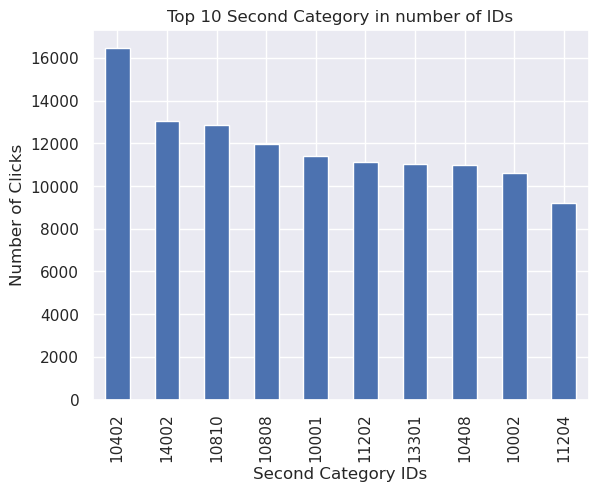

In [67]:
# Calculate the percentage of clicks for each item
click_percentage = cold_data.groupby('category_second')['click'].sum()
# Print the top 10 items with the highest click percentages
top_items = click_percentage.nlargest(10)


# Plot a histogram of the click percentages
x= top_items.plot(kind='bar')
x= plt.xlabel('Second Category IDs')
x= plt.ylabel('Number of Clicks')
x= plt.title('Top 10 Second Category in number of IDs')
plt.show()


#### A. cold_data.csv

In [8]:
# Show the first 5 samples of the dataframe
cold_data.head()

,user_id,item_id,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read,read_time,share,like,follow,favorite
0,393219,73342,1.000,2,2,73,1,0,25.000,3,3.000,12000,120,1.000,True,4.000,False,False,False,False
1,393219,17695,1.000,2,2,29552,209,84,43.000,3,3.000,11204,112,2.000,True,19.000,False,False,False,False
2,393219,40457,1.000,2,2,20285,242,90,43.000,4,7.000,10203,102,6.000,True,104.000,False,False,False,False
3,393219,79388,1.000,2,2,284492,1233,1783,78.000,3,3.000,11012,110,6.000,True,88.000,False,False,False,False
4,393219,80831,1.000,2,2,25890,108,68,181.000,3,3.000,11202,112,2.000,True,134.000,False,False,False,False


In [10]:
# Show the information regarding each column
cold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343305 entries, 0 to 343304
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          343305 non-null  int64  
 1   item_id          343305 non-null  int64  
 2   click            343305 non-null  float64
 3   gender           343305 non-null  int64  
 4   age              343305 non-null  int64  
 5   click_count      343305 non-null  int64  
 6   like_count       343305 non-null  int64  
 7   comment_count    343305 non-null  int64  
 8   read_percentage  343305 non-null  float64
 9   item_score1      343305 non-null  int64  
 10  item_score2      343305 non-null  float64
 11  category_second  343305 non-null  int64  
 12  category_first   343305 non-null  int64  
 13  item_score3      343305 non-null  float64
 14  read             343305 non-null  bool   
 15  read_time        343305 non-null  float64
 16  share            343305 non-null  bool

This dataset consists of 343305 samples with 20 features. This contains the largest number of samples as it includes the most of users due to the filtering.

For the next datasets that we will observe, you will notice that the number of samples is increasing with every one.

In [29]:
# Statistical description of the dataset
cold_data.drop(['user_id', 'item_id'], axis=1).describe()

,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read_time
count,343305.000,343305.000,343305.000,343305.000,343305.000,343305.000,343305.000,343305.000,343305.000,343305.000,343305.000,343305.000,343305.000
mean,1.000,1.326,2.636,160324.503,2258.861,877.328,50.867,3.003,3.073,11380.148,114.089,4.558,58.554
std,0.000,0.472,1.247,343059.898,6842.742,1697.550,29.283,0.775,0.659,1563.780,14.693,3.033,80.518
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,1.000,2.000,17778.000,96.000,77.000,29.000,3.000,3.000,10802.000,108.000,3.000,9.000
50%,1.000,1.000,2.000,58650.000,364.000,322.000,48.000,3.000,3.000,11201.000,112.000,5.000,31.000
75%,1.000,2.000,3.000,160058.000,1371.000,986.000,68.000,4.000,3.000,12106.000,121.000,6.000,78.000
max,1.000,2.000,7.000,6824316.000,151656.000,45677.000,549.000,4.000,9.000,14102.000,141.000,255.000,1886.000


A thing that we can take from the following description of the data is that:
1. The gender is divided into three categories: *0*, *1*, and *2*
2. The age is not diversed. Meaning that the ages of the users are segmented into eight categories, from *0* to *7*. 

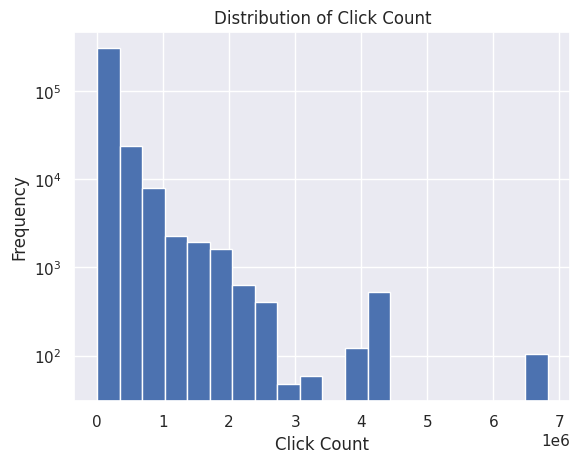

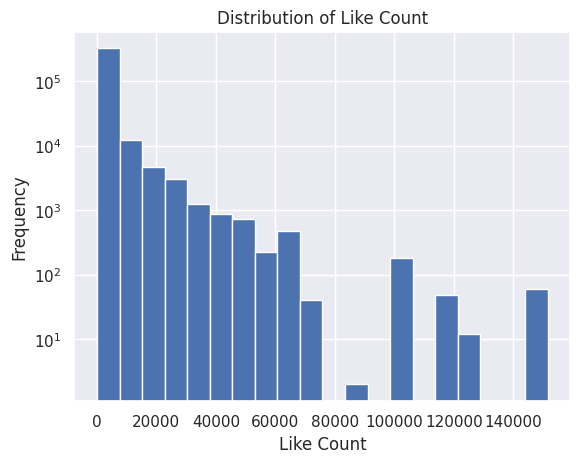

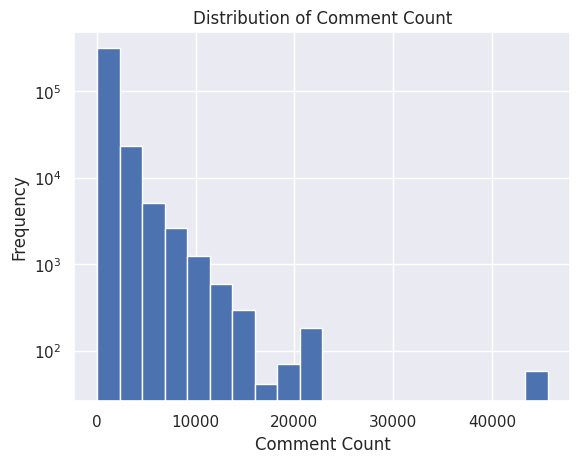

In [30]:
# Create a histogram of click_count
plt.hist(cold_data['click_count'], bins=20)
plt.xlabel('Click Count')
plt.ylabel('Frequency')
plt.title('Distribution of Click Count')
plt.yscale('log')
plt.show();

# Create a histogram of like_count
plt.hist(cold_data['like_count'], bins=20)
plt.xlabel('Like Count')
plt.ylabel('Frequency')
plt.title('Distribution of Like Count')
plt.yscale('log')
plt.show();

# Create a histogram of comment_count
plt.hist(cold_data['comment_count'], bins=20)
plt.xlabel('Comment Count')
plt.ylabel('Frequency')
plt.title('Distribution of Comment Count')
plt.yscale('log')
plt.show();



If we take a closer look towards the engagements columns, we can find that the count of clicks, likes and comments, the histogram is right skewed. This shows that a high number of the users are not very engaging. 

Another thing is that due to the skewness of the plots, as we go right, we can see the appearence of outliers (users with higher engagement)has_outliers

In [61]:
def has_outliers(df, column):
    """
    This functions finds the existence of outliers in column of a dataframe. Also, it counts the number of outliers if exists.
    Input:
        - df (dataframe): dataframe hosting the column
        - column (series): the column in question
    Output:
        - print of the result
    """
    first_quartile = df[column].quantile(0.25)
    third_quartile = df[column].quantile(0.75)
    interquartile_range = third_quartile - first_quartile

    # Identify the outliers for the column
    lower = first_quartile - 1.5 * interquartile_range
    upper = third_quartile + 1.5 * interquartile_range
    outliers_data = df[column].loc[(df[column] < lower) | (df[column] > upper)]

    # Check if there are any outliers
    if any(outliers_data):
        # df.loc[outliers_data.index, :] = first_quartile if outliers_data < first_quartile else third_quartile
        print('There are outliers in the {} column count {:,}'.format(column, outliers_data.shape[0]))
    else:
        print('There are no outliers in the {} column'.format(column))

In [62]:
for column in ['click_count', 'like_count', 'comment_count']:
    has_outliers(cold_data, column)

There are outliers in the click_count column count 35,748
There are outliers in the like_count column count 48,125
There are outliers in the comment_count column count 32,149


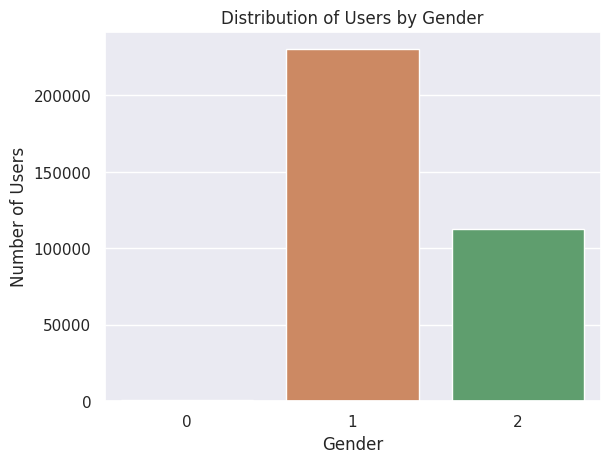

In [100]:
# Create a histogram of the age distribution
sns.countplot(x= 'gender' , data = cold_data)
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Gender')
plt.show();

In [101]:
# count the number of samples per unique value
cold_data['gender'].value_counts() 

1    230225
2    112525
0       555
Name: gender, dtype: int64

The gender with label *0* has very small number of samples, thus, it was shown in the plot. It holds 1.6% of the dataset.

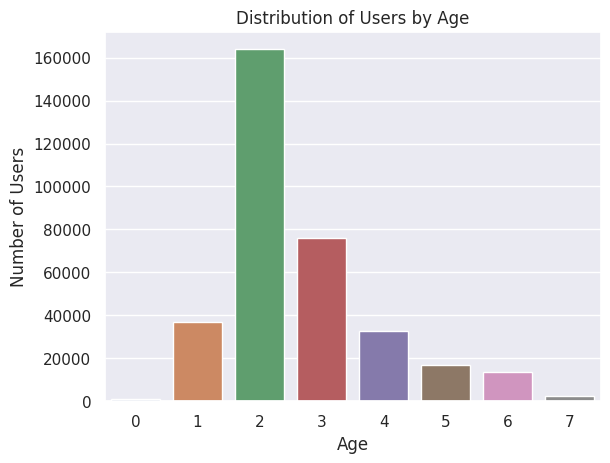

In [97]:
# Create a histogram of the age distribution
sns.countplot(x= 'age' , data = cold_data)
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Age')
plt.show();

Category *2* in age is substantially found in the dataset, holding almost 50% of the samples, whereas the rest are spread across the other categories.

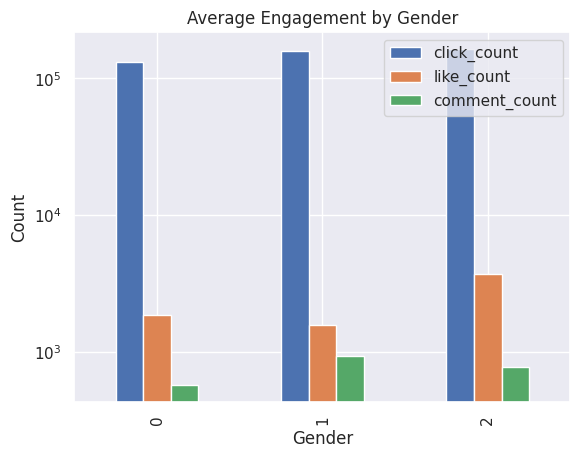

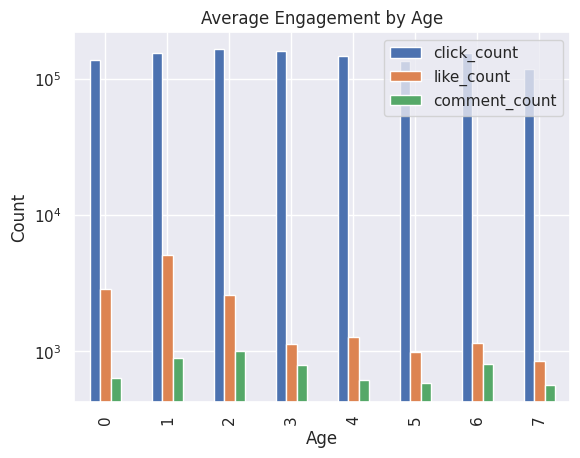

In [156]:
# Create a bar chart of the average click_count, like_count, and comment_count by gender
grouped_df = cold_data.groupby('gender')[['click_count', 'like_count', 'comment_count']].mean()
grouped_df.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Average Engagement by Gender')
plt.yscale('log')
plt.show();

# Create a bar chart of the average click_count, like_count, and comment_count by gender
grouped_df = cold_data.groupby('age')[['click_count', 'like_count', 'comment_count']].mean()
grouped_df.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Average Engagement by Age')
plt.yscale('log')
plt.show();

*click_count* is the highest engagement in the dataset, and that was established before. But what we want to show here is how the other two engagements are distributed on the ages and the genders. 

*like_count* is found more in than the *comment_count*. The gender the holds the biggest number of like count is *2*, while the age is of label *1*. The ages *0* and *2* are very close when it comes to the likes.

In [ ]:
# Calculate the frequency of each type of engagement
engagement = cold_data[['read', 'share', 'like', 'follow', 'favorite']]
for col in engagement.columns:
  engagement[col] = engagement[col].astype('str')
engagement_freq = engagement.apply(pd.Series.value_counts)

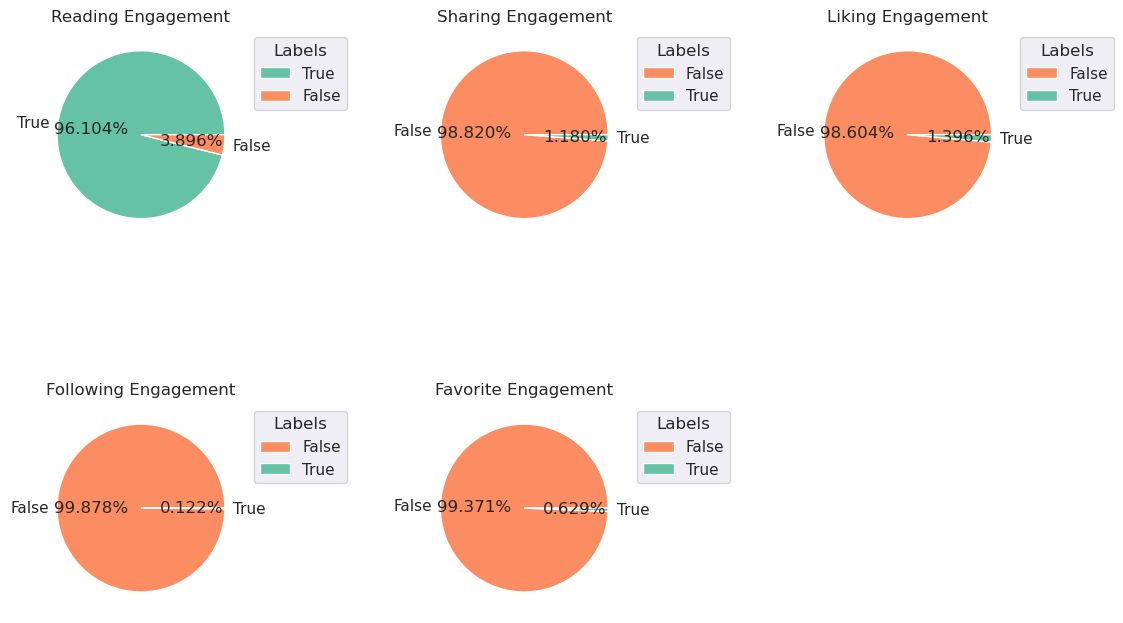

In [72]:
# Define a color dictionary to map each label to a color
color_dict = {'True': '#66c2a5', 'False': '#fc8d62'}

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

axs[0, 0].pie(engagement['read'].value_counts(), labels=engagement['read'].unique(), colors=[color_dict[label] for label in engagement['read'].unique()], autopct='%1.3f%%')
axs[0, 0].set_title("Reading Engagement")
axs[0, 0].legend(title="Labels", labels=engagement['read'].unique(), bbox_to_anchor=(1, 1))

axs[0, 1].pie(engagement['share'].value_counts(), labels=engagement['share'].unique(), colors=[color_dict[label] for label in engagement['share'].unique()], autopct='%1.3f%%')
axs[0, 1].set_title("Sharing Engagement")
axs[0, 1].legend(title="Labels", labels=engagement['share'].unique(), bbox_to_anchor=(1, 1))

axs[0, 2].pie(engagement['like'].value_counts(), labels=engagement['like'].unique(), colors=[color_dict[label] for label in engagement['like'].unique()], autopct='%1.3f%%')
axs[0, 2].set_title("Liking Engagement")
axs[0, 2].legend(title="Labels", labels=engagement['like'].unique(), bbox_to_anchor=(1, 1))

axs[1, 0].pie(engagement['follow'].value_counts(), labels=engagement['follow'].unique(), colors=[color_dict[label] for label in engagement['follow'].unique()], autopct='%1.3f%%')
axs[1, 0].set_title("Following Engagement")
axs[1, 0].legend(title="Labels", labels=engagement['follow'].unique(), bbox_to_anchor=(1, 1))

axs[1, 1].pie(engagement['favorite'].value_counts(), labels=engagement['favorite'].unique(), colors=[color_dict[label] for label in engagement['favorite'].unique()], autopct='%1.3f%%')
axs[1, 1].set_title("Favorite Engagement")
axs[1, 1].legend(title="Labels", labels=engagement['favorite'].unique(), bbox_to_anchor=(1, 1))

axs[1, 2].remove()

# Adjust the layout
fig.tight_layout(pad=3.0)

# Show the plot
plt.show();

As expected, the most engaging engagement is of course *read*. The other engagements are found in True but with a negligible amount. The other way round is for the False. This confirms the insights that we have discussed before.

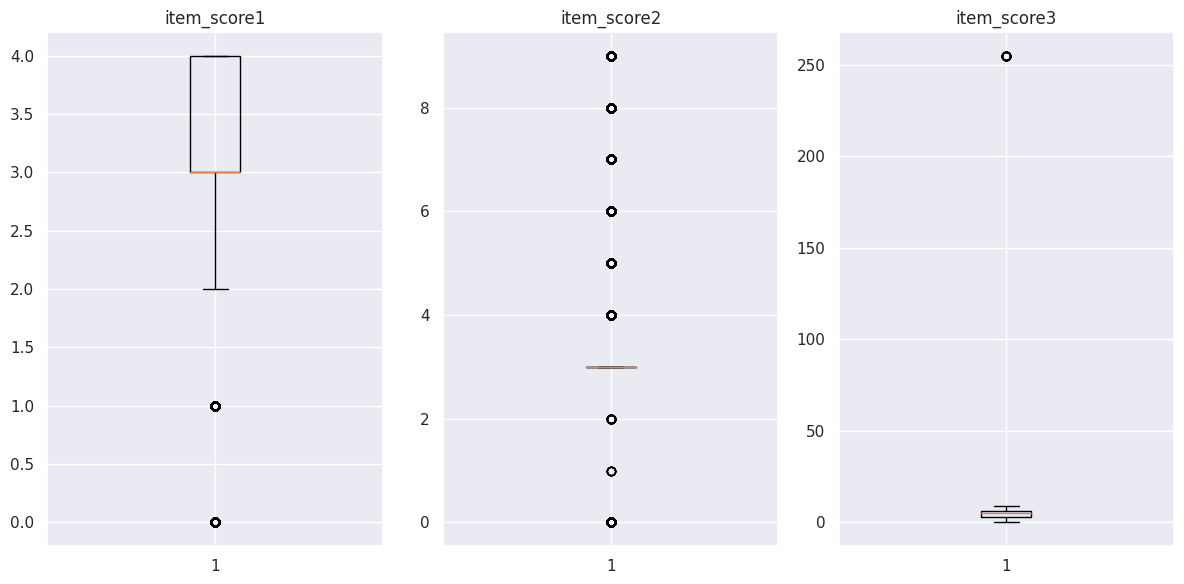

In [69]:
# Create a box plot of item_score1, item_score2, and item_score3
fig, axs = plt.subplots(ncols=3, figsize=(12, 6))
axs[0].boxplot(cold_data['item_score1'])
axs[0].set_title('item_score1')
axs[1].boxplot(cold_data['item_score2'])
axs[1].set_title('item_score2')
axs[2].boxplot(cold_data['item_score3'])
axs[2].set_title('item_score3')

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show();

For the item columns, the box plots show the existence of outliers in these columns too. To confirm this, we run the the previous cell to confirm this even more.

In [73]:
for column in ['item_score1', 'item_score2', 'item_score3']:
    has_outliers(cold_data, column)

There are outliers in the item_score1 column count 4,777
There are outliers in the item_score2 column count 11,108
There are outliers in the item_score3 column count 26


The number of outliers of *item_score3* is very minor in comparison to the other items columns. Yet, they are found far away from the maximum value.  

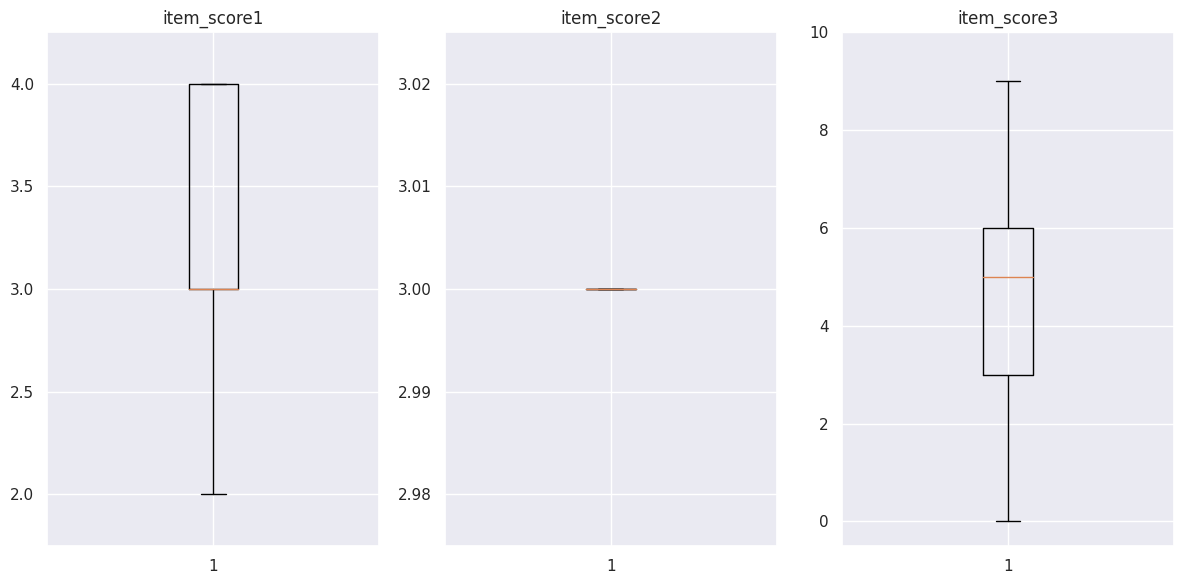

In [82]:
# Focusing on the box itself
# Create a box plot of item_score1, item_score2, and item_score3
fig, axs = plt.subplots(ncols=3, figsize=(12, 6))
axs[0].boxplot(cold_data['item_score1'])
axs[0].set_ylim(1.75,4.25)
axs[0].set_title('item_score1')
axs[1].boxplot(cold_data['item_score2'])
axs[1].set_ylim(2.975,3.025)
axs[1].set_title('item_score2')
axs[2].boxplot(cold_data['item_score3'])
axs[2].set_ylim(-.5, 10)
axs[2].set_title('item_score3')

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show();

Zooming on the box plots, we find: 
1. item_score1:
    * Minimum = 2
    * Maximum = 4, which is also the value of the upper quartile 
    * Median = 3. It is also the value of the lower quartile
2. item_score2:
    * All values of minimum, lower quartile, median, upper quartile, and maximum hold the same value, which is 3. This is most probably because the majority of the samples holds this value.
3. item_score3:
    * Minimum = 0
    * Lower  = 3
    * Median = 5
    * Upper quartile = 6
    * Maximum = 9

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

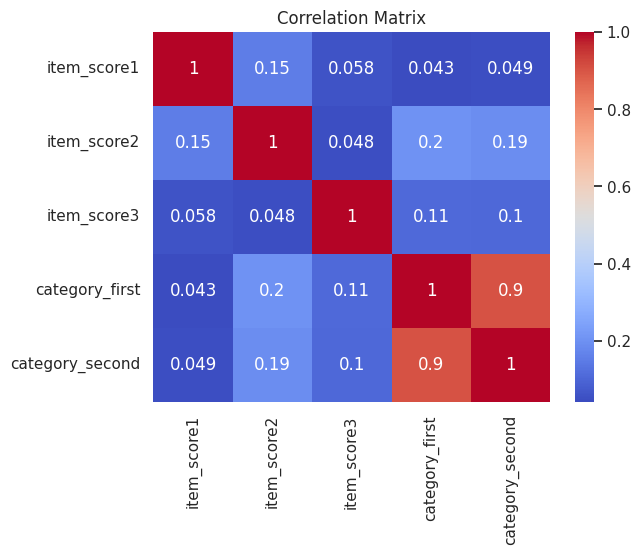

In [94]:
# plot the correlation between the item score columns and the category columns in the dataset
sns.heatmap(cold_data[['item_score1', 'item_score2', 'item_score3', 'category_first', 'category_second']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show();

This correlation plot showed that:
* The item score columns have a low correlations between one another, on the other hand
* The category columns are higly correlated with 90% correlation

### 2. cold_data_1.csv

In [102]:
# Show the first 5 samples of the dataframe
cold_data_1.head()

,user_id,item_id,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read,read_time,share,like,follow,favorite
0,393219,73342,1.000,2,2,73,1,0,25.000,3,3.000,12000,120,1.000,True,4.000,False,False,False,False
1,393219,17695,1.000,2,2,29552,209,84,43.000,3,3.000,11204,112,2.000,True,19.000,False,False,False,False
2,917512,60594,1.000,1,4,485,1,0,45.000,2,3.000,12103,121,6.000,True,15.000,False,False,False,False
3,917512,8575,1.000,1,4,9850,11,14,42.000,2,3.000,12108,121,6.000,True,37.000,False,False,False,False
4,917512,23209,1.000,1,4,59767,112,47,70.000,2,3.000,12100,121,5.000,True,55.000,False,False,False,False


In [103]:
# Show the information regarding each column
cold_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206629 entries, 0 to 206628
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          206629 non-null  int64  
 1   item_id          206629 non-null  int64  
 2   click            206629 non-null  float64
 3   gender           206629 non-null  int64  
 4   age              206629 non-null  int64  
 5   click_count      206629 non-null  int64  
 6   like_count       206629 non-null  int64  
 7   comment_count    206629 non-null  int64  
 8   read_percentage  206629 non-null  float64
 9   item_score1      206629 non-null  int64  
 10  item_score2      206629 non-null  float64
 11  category_second  206629 non-null  int64  
 12  category_first   206629 non-null  int64  
 13  item_score3      206629 non-null  float64
 14  read             206629 non-null  bool   
 15  read_time        206629 non-null  float64
 16  share            206629 non-null  bool

The number of samples for this dataset is 296629 with the same number of columns. This dataset contains 100% cold start users.

In [104]:
# Statistical description of the dataset
cold_data_1.drop(['user_id', 'item_id'], axis=1).describe()

,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read_time
count,206629.000,206629.000,206629.000,206629.000,206629.000,206629.000,206629.000,206629.000,206629.000,206629.000,206629.000,206629.000,206629.000
mean,1.000,1.326,2.636,160967.046,2252.536,880.969,51.016,3.003,3.070,11374.879,114.011,4.559,58.925
std,0.000,0.472,1.244,345674.969,6886.042,1703.413,29.292,0.776,0.653,1564.152,14.777,3.001,80.870
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,1.000,2.000,17852.000,96.000,78.000,29.000,3.000,3.000,10802.000,108.000,3.000,9.000
50%,1.000,1.000,2.000,58757.000,363.000,323.000,48.000,3.000,3.000,11201.000,112.000,5.000,31.000
75%,1.000,2.000,3.000,160953.000,1354.000,990.000,68.000,4.000,3.000,12104.000,121.000,6.000,79.000
max,1.000,2.000,7.000,6824316.000,151656.000,45677.000,549.000,4.000,9.000,14102.000,141.000,255.000,1886.000


The statistics have not changed much. It is certain that the quartiles values have changed, yet not drastically though. The minimum and maximum values have actually changed, and now we expect that to happen for the next datasets.

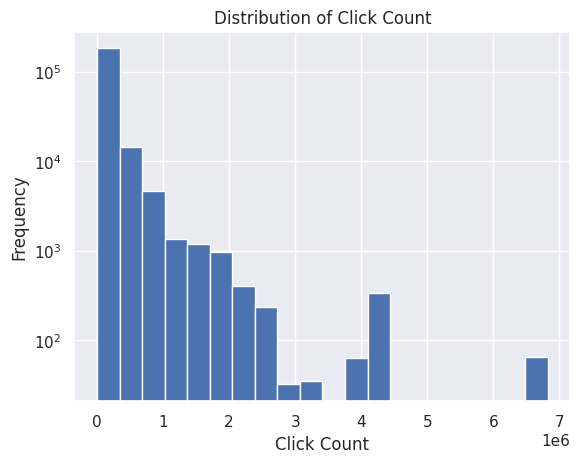

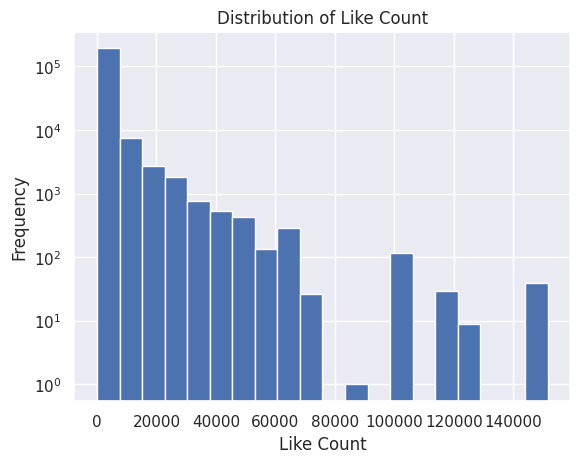

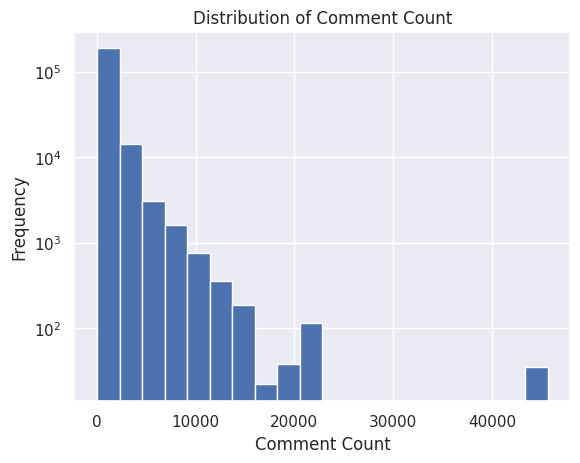

In [105]:
# Create a histogram of click_count
plt.hist(cold_data_1['click_count'], bins=20)
plt.xlabel('Click Count')
plt.ylabel('Frequency')
plt.title('Distribution of Click Count')
plt.yscale('log')
plt.show();

# Create a histogram of like_count
plt.hist(cold_data_1['like_count'], bins=20)
plt.xlabel('Like Count')
plt.ylabel('Frequency')
plt.title('Distribution of Like Count')
plt.yscale('log')
plt.show();

# Create a histogram of comment_count
plt.hist(cold_data_1['comment_count'], bins=20)
plt.xlabel('Comment Count')
plt.ylabel('Frequency')
plt.title('Distribution of Comment Count')
plt.yscale('log')
plt.show();



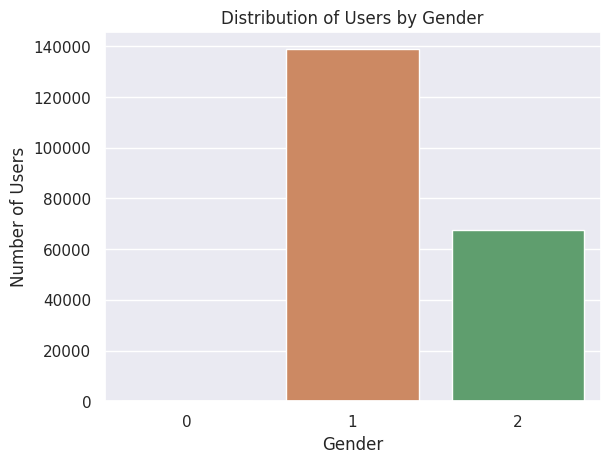

In [106]:
# Create a histogram of the age distribution
sns.countplot(x= 'gender' , data = cold_data_1)
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Gender')
plt.show();

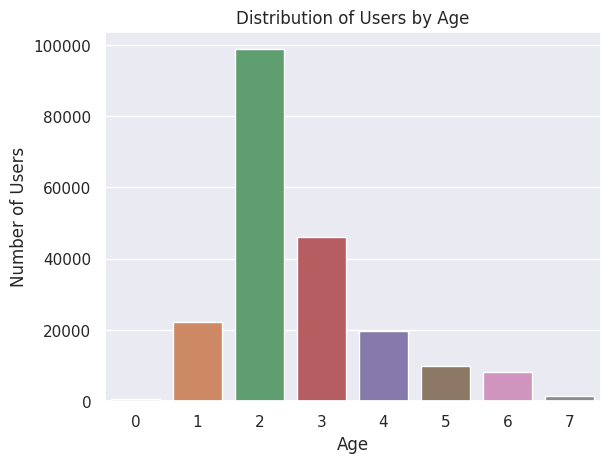

In [108]:
# Create a histogram of the age distribution
sns.countplot(x= 'age' , data = cold_data_1)
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Age')
plt.show();

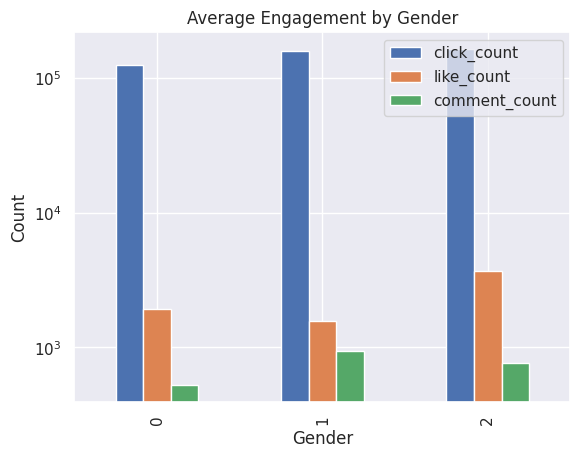

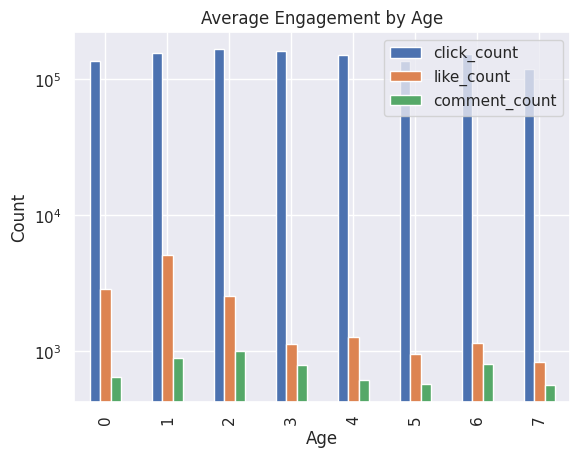

In [155]:
# Create a bar chart of the average click_count, like_count, and comment_count by gender
grouped_df = cold_data_1.groupby('gender')[['click_count', 'like_count', 'comment_count']].mean()
grouped_df.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Average Engagement by Gender')
plt.yscale('log')
plt.show();

# Create a bar chart of the average click_count, like_count, and comment_count by gender
grouped_df = cold_data_1.groupby('age')[['click_count', 'like_count', 'comment_count']].mean()
grouped_df.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Average Engagement by Age')
plt.yscale('log')
plt.show();

In [75]:
# Calculate the frequency of each type of engagement
engagement = cold_data_1[['read', 'share', 'like', 'follow', 'favorite']]
for col in engagement.columns:
  engagement[col] = engagement[col].astype(str)
engagement_freq = engagement.apply(pd.Series.value_counts)

/tmp/ipykernel_9787/3996366400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engagement[col] = engagement[col].astype(str)
/tmp/ipykernel_9787/3996366400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engagement[col] = engagement[col].astype(str)
/tmp/ipykernel_9787/3996366400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

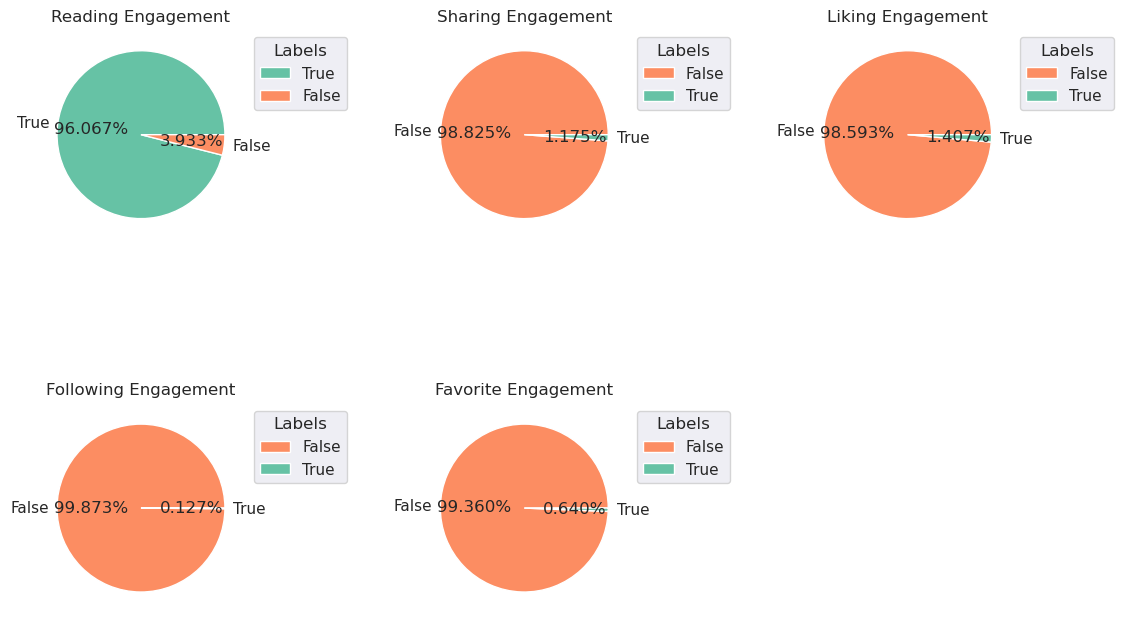

In [76]:
# Define a color dictionary to map each label to a color
color_dict = {'True': '#66c2a5', 'False': '#fc8d62'}

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

axs[0, 0].pie(engagement['read'].value_counts(), labels=engagement['read'].unique(), colors=[color_dict[label] for label in engagement['read'].unique()], autopct='%1.3f%%')
axs[0, 0].set_title("Reading Engagement")
axs[0, 0].legend(title="Labels", labels=engagement['read'].unique(), bbox_to_anchor=(1, 1))

axs[0, 1].pie(engagement['share'].value_counts(), labels=engagement['share'].unique(), colors=[color_dict[label] for label in engagement['share'].unique()], autopct='%1.3f%%')
axs[0, 1].set_title("Sharing Engagement")
axs[0, 1].legend(title="Labels", labels=engagement['share'].unique(), bbox_to_anchor=(1, 1))

axs[0, 2].pie(engagement['like'].value_counts(), labels=engagement['like'].unique(), colors=[color_dict[label] for label in engagement['like'].unique()], autopct='%1.3f%%')
axs[0, 2].set_title("Liking Engagement")
axs[0, 2].legend(title="Labels", labels=engagement['like'].unique(), bbox_to_anchor=(1, 1))

axs[1, 0].pie(engagement['follow'].value_counts(), labels=engagement['follow'].unique(), colors=[color_dict[label] for label in engagement['follow'].unique()], autopct='%1.3f%%')
axs[1, 0].set_title("Following Engagement")
axs[1, 0].legend(title="Labels", labels=engagement['follow'].unique(), bbox_to_anchor=(1, 1))

axs[1, 1].pie(engagement['favorite'].value_counts(), labels=engagement['favorite'].unique(), colors=[color_dict[label] for label in engagement['favorite'].unique()], autopct='%1.3f%%')
axs[1, 1].set_title("Favorite Engagement")
axs[1, 1].legend(title="Labels", labels=engagement['favorite'].unique(), bbox_to_anchor=(1, 1))

axs[1, 2].remove()

# Adjust the layout
fig.tight_layout(pad=3.0)

# Show the plot
plt.show();

The previous plots are almost the same when it comes to their distribution and skewness.

These pie charts are slightly changed in a specific ways. By comparing the pie charts of this dataset to the previous one, we can that the minor percentage becomes smaller each for each pie chart.

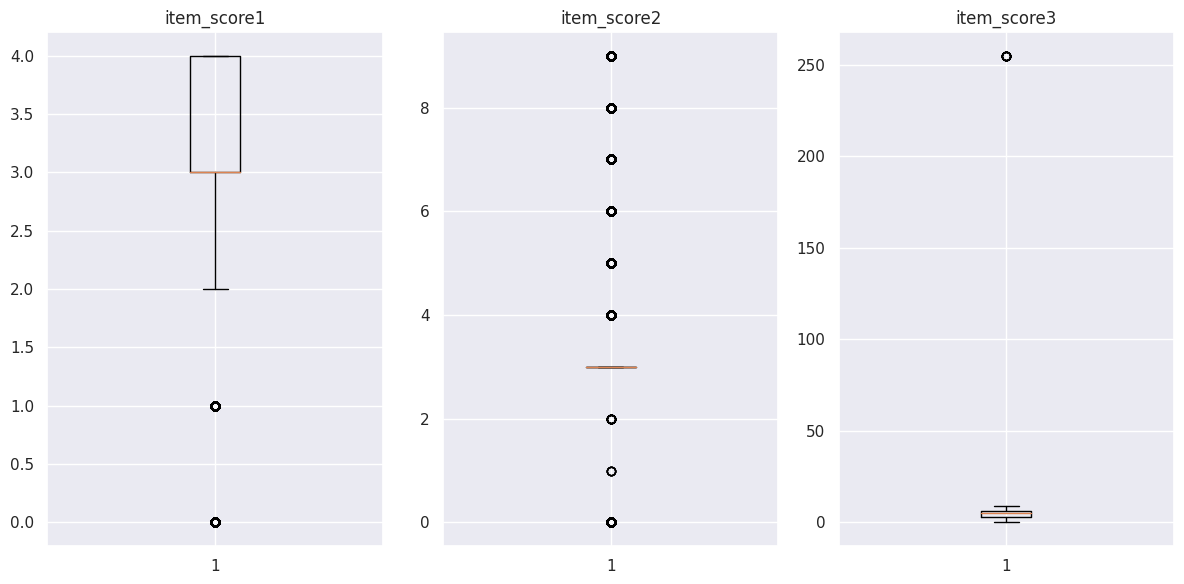

In [115]:
# Create a box plot of item_score1, item_score2, and item_score3
fig, axs = plt.subplots(ncols=3, figsize=(12, 6))
axs[0].boxplot(cold_data_1['item_score1'])
axs[0].set_title('item_score1')
axs[1].boxplot(cold_data_1['item_score2'])
axs[1].set_title('item_score2')
axs[2].boxplot(cold_data_1['item_score3'])
axs[2].set_title('item_score3')

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show();

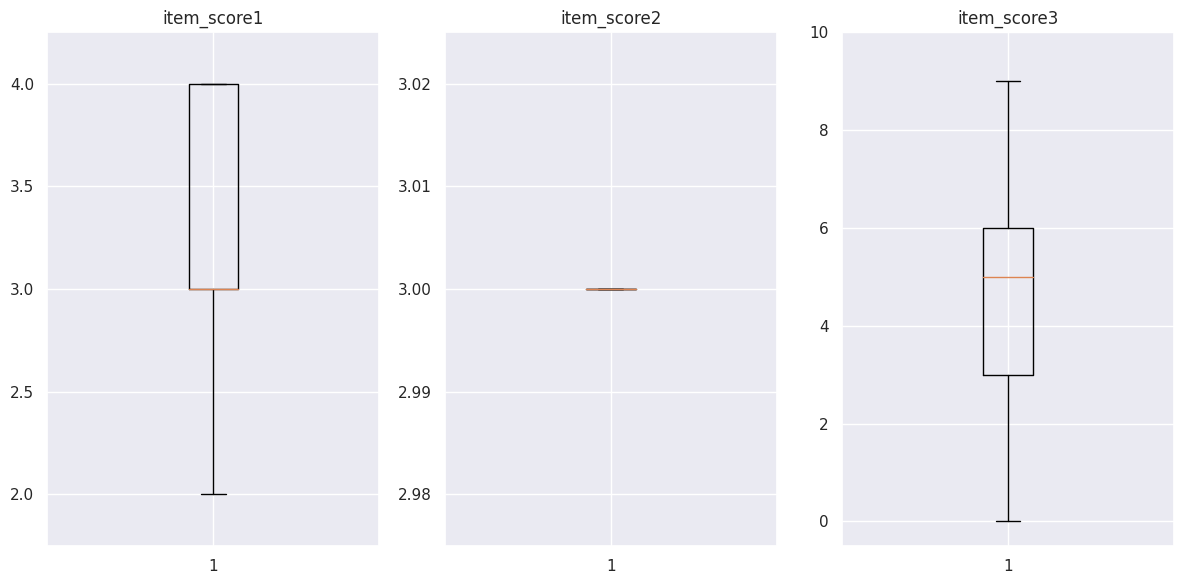

In [117]:
# Focusing on the box itself
# Create a box plot of item_score1, item_score2, and item_score3
fig, axs = plt.subplots(ncols=3, figsize=(12, 6))
axs[0].boxplot(cold_data_1['item_score1'])
axs[0].set_ylim(1.75,4.25)
axs[0].set_title('item_score1')
axs[1].boxplot(cold_data_1['item_score2'])
axs[1].set_ylim(2.975,3.025)
axs[1].set_title('item_score2')
axs[2].boxplot(cold_data_1['item_score3'])
axs[2].set_ylim(-.5, 10)
axs[2].set_title('item_score3')

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show();

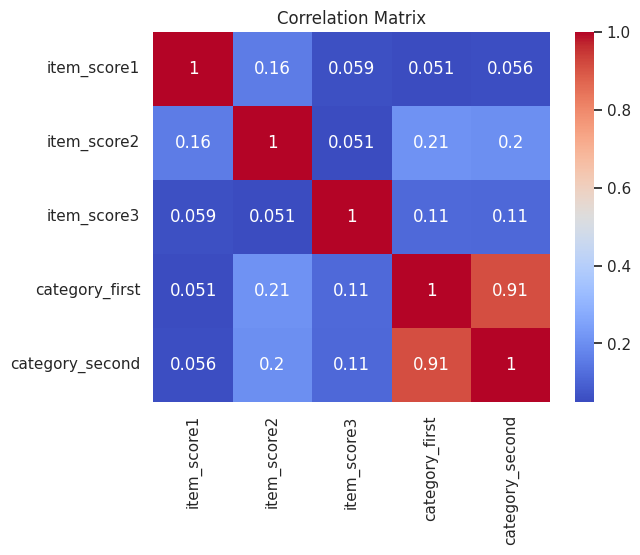

In [118]:
sns.heatmap(cold_data_1[['item_score1', 'item_score2', 'item_score3', 'category_first', 'category_second']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show();

We can see here that with decreasing the number of samples, the correlation increased. This is visible in the category columns which their correlation increased from 90% to 91%.

### 3. cold_data_0.7.csv

In [119]:
# Show the first 5 samples of the dataframe
cold_data_07.head()

,user_id,item_id,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read,read_time,share,like,follow,favorite
0,393219,73342,1.000,2,2,73,1,0,25.000,3,3.000,12000,120,1.000,True,4.000,False,False,False,False
1,393219,17695,1.000,2,2,29552,209,84,43.000,3,3.000,11204,112,2.000,True,19.000,False,False,False,False
2,393219,40457,1.000,2,2,20285,242,90,43.000,4,7.000,10203,102,6.000,True,104.000,False,False,False,False
3,917512,60594,1.000,1,4,485,1,0,45.000,2,3.000,12103,121,6.000,True,15.000,False,False,False,False
4,917512,8575,1.000,1,4,9850,11,14,42.000,2,3.000,12108,121,6.000,True,37.000,False,False,False,False


In [120]:
# Show the information regarding each column
cold_data_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263750 entries, 0 to 1263749
Data columns (total 20 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   user_id          1263750 non-null  int64  
 1   item_id          1263750 non-null  int64  
 2   click            1263750 non-null  float64
 3   gender           1263750 non-null  int64  
 4   age              1263750 non-null  int64  
 5   click_count      1263750 non-null  int64  
 6   like_count       1263750 non-null  int64  
 7   comment_count    1263750 non-null  int64  
 8   read_percentage  1263750 non-null  float64
 9   item_score1      1263750 non-null  int64  
 10  item_score2      1263750 non-null  float64
 11  category_second  1263750 non-null  int64  
 12  category_first   1263750 non-null  int64  
 13  item_score3      1263750 non-null  float64
 14  read             1263750 non-null  bool   
 15  read_time        1263750 non-null  float64
 16  share            1

The number of samples has highly-increased . It consists around 1.3 million samples of users with 20 different features. This dataset both cold and hot users. 

In [121]:
# Statistical description of the dataset
cold_data_07.drop(['user_id', 'item_id'], axis=1).describe()

,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read_time
count,1263750.000,1263750.000,1263750.000,1263750.000,1263750.000,1263750.000,1263750.000,1263750.000,1263750.000,1263750.000,1263750.000,1263750.000,1263750.000
mean,1.000,1.312,2.650,144915.301,1866.968,788.181,50.142,3.021,3.077,11380.148,114.070,4.559,54.127
std,0.000,0.469,1.245,340234.238,5911.025,1633.911,28.868,0.764,0.656,1517.201,14.256,4.152,77.372
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,1.000,2.000,13813.000,74.000,59.000,28.000,3.000,3.000,10802.000,108.000,3.000,7.000
50%,1.000,1.000,2.000,48095.000,295.000,265.000,47.000,3.000,3.000,11201.000,112.000,5.000,27.000
75%,1.000,2.000,3.000,137512.000,1036.000,852.000,67.000,4.000,3.000,12103.000,121.000,6.000,72.000
max,1.000,2.000,7.000,6824316.000,151656.000,45677.000,600.000,5.000,9.000,14102.000,141.000,255.000,4446.000


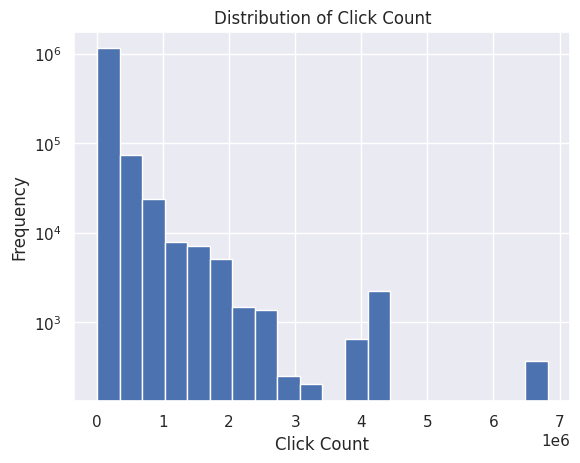

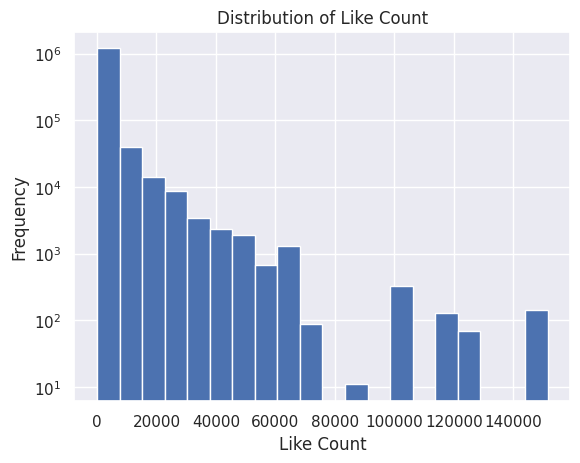

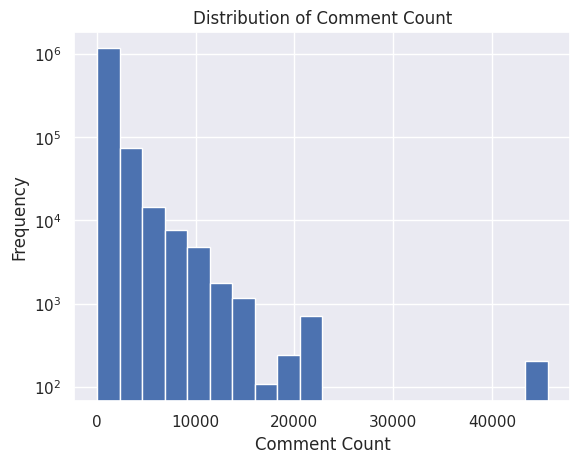

In [123]:
# Create a histogram of click_count
plt.hist(cold_data_07['click_count'], bins=20)
plt.xlabel('Click Count')
plt.ylabel('Frequency')
plt.title('Distribution of Click Count')
plt.yscale('log')
plt.show();

# Create a histogram of like_count
plt.hist(cold_data_07['like_count'], bins=20)
plt.xlabel('Like Count')
plt.ylabel('Frequency')
plt.title('Distribution of Like Count')
plt.yscale('log')
plt.show();

# Create a histogram of comment_count
plt.hist(cold_data_07['comment_count'], bins=20)
plt.xlabel('Comment Count')
plt.ylabel('Frequency')
plt.title('Distribution of Comment Count')
plt.yscale('log')
plt.show();



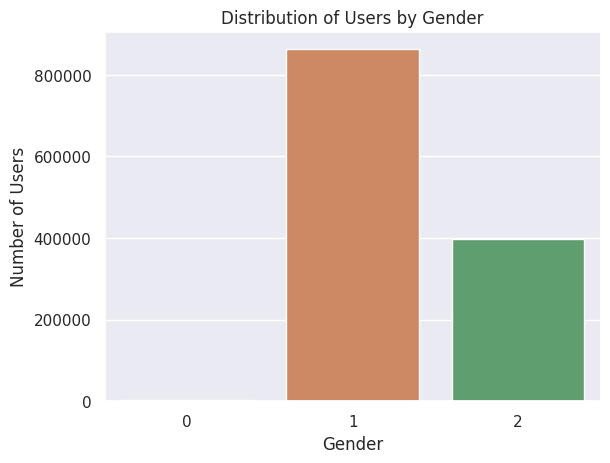

In [124]:
# Create a histogram of the age distribution
sns.countplot(x= 'gender' , data = cold_data_07)
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Gender')
plt.show();

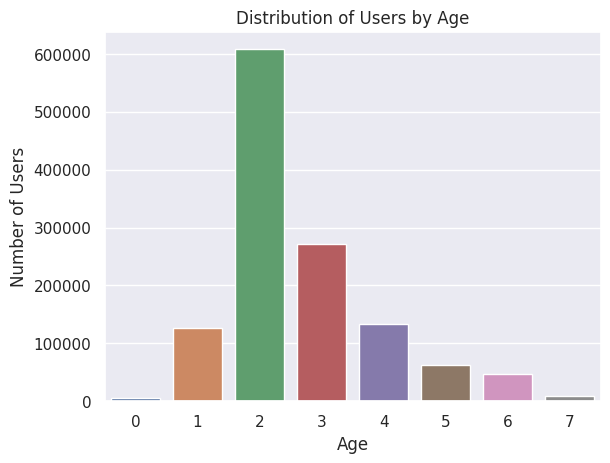

In [126]:
# Create a histogram of the age distribution
sns.countplot(x= 'age' , data = cold_data_07)
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Age')
plt.show();

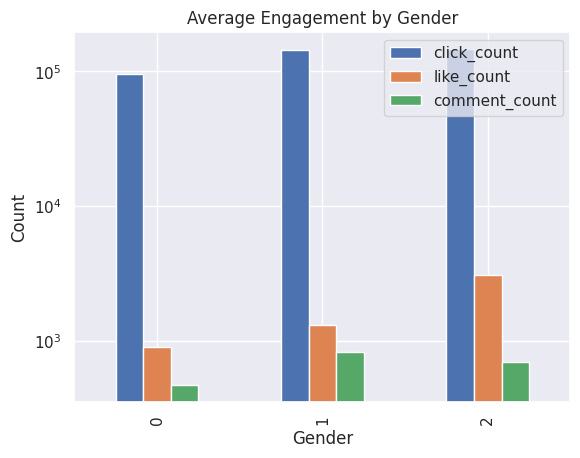

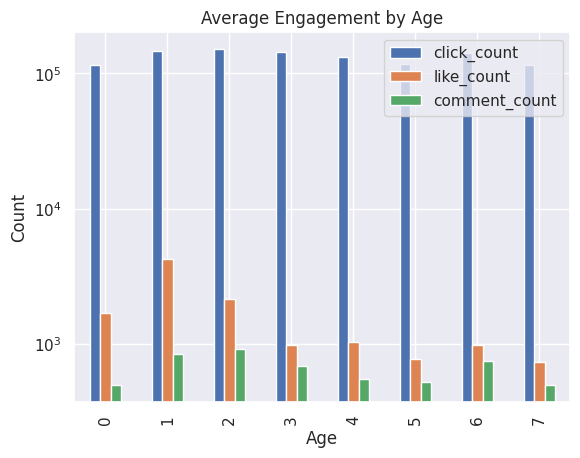

In [157]:
# Create a bar chart of the average click_count, like_count, and comment_count by gender
grouped_df = cold_data_07.groupby('gender')[['click_count', 'like_count', 'comment_count']].mean()
grouped_df.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Average Engagement by Gender')
plt.yscale('log')
plt.show();

# Create a bar chart of the average click_count, like_count, and comment_count by gender
grouped_df = cold_data_07.groupby('age')[['click_count', 'like_count', 'comment_count']].mean()
grouped_df.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Average Engagement by Age')
plt.yscale('log')
plt.show();

In [78]:
# Calculate the frequency of each type of engagement
engagement = cold_data_07[['read', 'share', 'like', 'follow', 'favorite']]
for col in engagement.columns:
  engagement[col] = engagement[col].astype(str)
engagement_freq = engagement.apply(pd.Series.value_counts)

/tmp/ipykernel_9787/2733361253.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engagement[col] = engagement[col].astype(str)
/tmp/ipykernel_9787/2733361253.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engagement[col] = engagement[col].astype(str)
/tmp/ipykernel_9787/2733361253.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

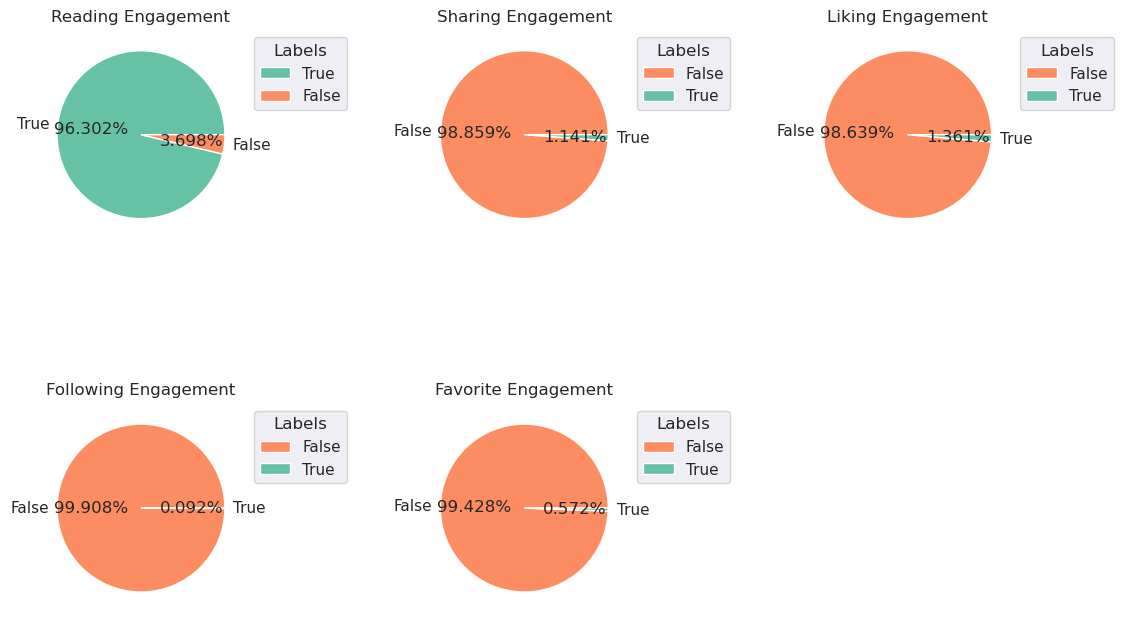

In [79]:
# Define a color dictionary to map each label to a color
color_dict = {'True': '#66c2a5', 'False': '#fc8d62'}

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

axs[0, 0].pie(engagement['read'].value_counts(), labels=engagement['read'].unique(), colors=[color_dict[label] for label in engagement['read'].unique()], autopct='%1.3f%%')
axs[0, 0].set_title("Reading Engagement")
axs[0, 0].legend(title="Labels", labels=engagement['read'].unique(), bbox_to_anchor=(1, 1))

axs[0, 1].pie(engagement['share'].value_counts(), labels=engagement['share'].unique(), colors=[color_dict[label] for label in engagement['share'].unique()], autopct='%1.3f%%')
axs[0, 1].set_title("Sharing Engagement")
axs[0, 1].legend(title="Labels", labels=engagement['share'].unique(), bbox_to_anchor=(1, 1))

axs[0, 2].pie(engagement['like'].value_counts(), labels=engagement['like'].unique(), colors=[color_dict[label] for label in engagement['like'].unique()], autopct='%1.3f%%')
axs[0, 2].set_title("Liking Engagement")
axs[0, 2].legend(title="Labels", labels=engagement['like'].unique(), bbox_to_anchor=(1, 1))

axs[1, 0].pie(engagement['follow'].value_counts(), labels=engagement['follow'].unique(), colors=[color_dict[label] for label in engagement['follow'].unique()], autopct='%1.3f%%')
axs[1, 0].set_title("Following Engagement")
axs[1, 0].legend(title="Labels", labels=engagement['follow'].unique(), bbox_to_anchor=(1, 1))

axs[1, 1].pie(engagement['favorite'].value_counts(), labels=engagement['favorite'].unique(), colors=[color_dict[label] for label in engagement['favorite'].unique()], autopct='%1.3f%%')
axs[1, 1].set_title("Favorite Engagement")
axs[1, 1].legend(title="Labels", labels=engagement['favorite'].unique(), bbox_to_anchor=(1, 1))

axs[1, 2].remove()

# Adjust the layout
fig.tight_layout(pad=3.0)

# Show the plot
plt.show();

We can see that there is a noticable increase in the non-reading users. For the other engagements, we can see that the True engagers decreases.

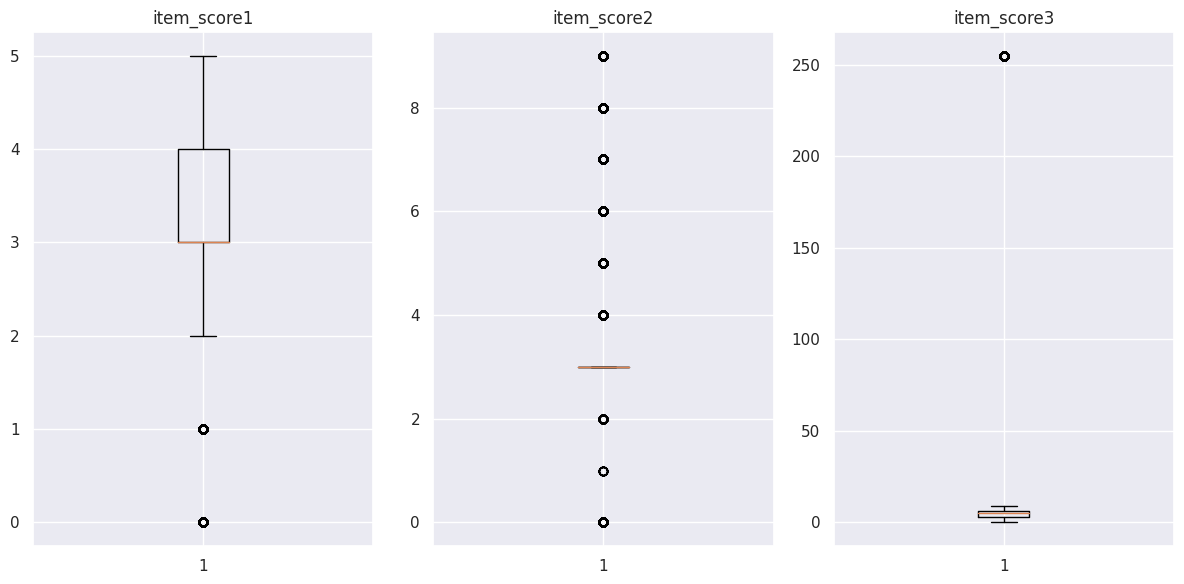

In [132]:
# Create a box plot of item_score1, item_score2, and item_score3
fig, axs = plt.subplots(ncols=3, figsize=(12, 6))
axs[0].boxplot(cold_data_07['item_score1'])
axs[0].set_title('item_score1')
axs[1].boxplot(cold_data_07['item_score2'])
axs[1].set_title('item_score2')
axs[2].boxplot(cold_data_07['item_score3'])
axs[2].set_title('item_score3')

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show();

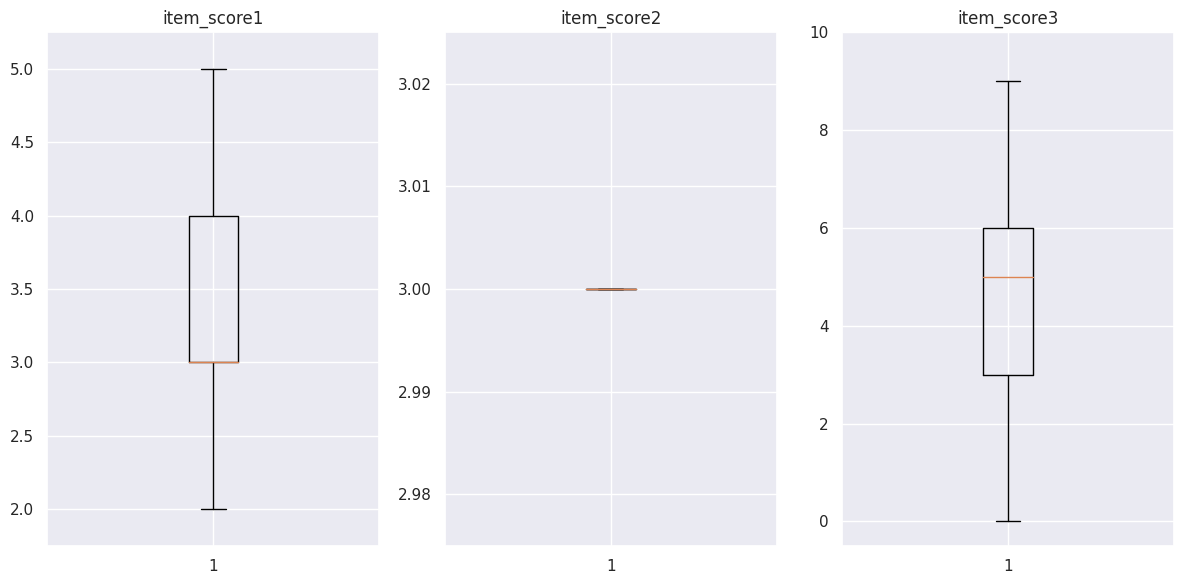

In [133]:
# Focusing on the box itself
# Create a box plot of item_score1, item_score2, and item_score3
fig, axs = plt.subplots(ncols=3, figsize=(12, 6))
axs[0].boxplot(cold_data_07['item_score1'])
axs[0].set_ylim(1.75,5.25)
axs[0].set_title('item_score1')
axs[1].boxplot(cold_data_07['item_score2'])
axs[1].set_ylim(2.975,3.025)
axs[1].set_title('item_score2')
axs[2].boxplot(cold_data_07['item_score3'])
axs[2].set_ylim(-.5, 10)
axs[2].set_title('item_score3')

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show();

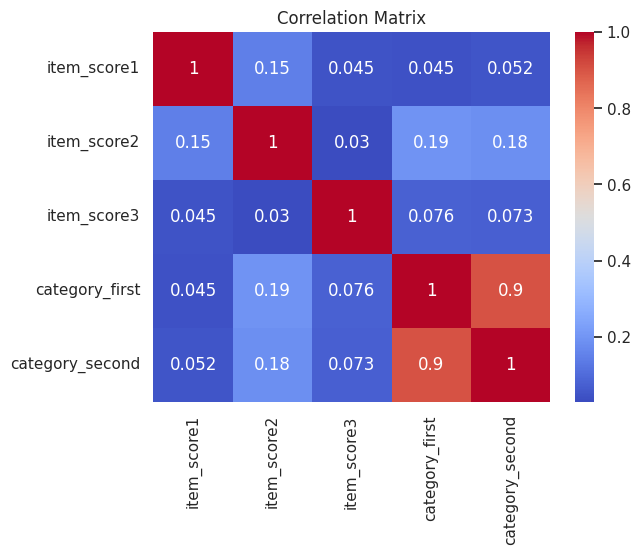

In [134]:
sns.heatmap(cold_data_07[['item_score1', 'item_score2', 'item_score3', 'category_first', 'category_second']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show();

### 4. cold_data_0.3.csv

In [135]:
# Show the first 5 samples of the dataframe
cold_data_03.head()

,user_id,item_id,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read,read_time,share,like,follow,favorite
0,393219,73342,1.000,2,2,73,1,0,25.000,3,3.000,12000,120,1.000,True,4.000,False,False,False,False
1,393219,17695,1.000,2,2,29552,209,84,43.000,3,3.000,11204,112,2.000,True,19.000,False,False,False,False
2,393219,40457,1.000,2,2,20285,242,90,43.000,4,7.000,10203,102,6.000,True,104.000,False,False,False,False
3,393219,79388,1.000,2,2,284492,1233,1783,78.000,3,3.000,11012,110,6.000,True,88.000,False,False,False,False
4,393219,80831,1.000,2,2,25890,108,68,181.000,3,3.000,11202,112,2.000,True,134.000,False,False,False,False


In [77]:
# Show the information regarding each column
cold_data_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2706527 entries, 0 to 2706526
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   user_id          int64  
 1   item_id          int64  
 2   click            float64
 3   gender           int64  
 4   age              int64  
 5   click_count      int64  
 6   like_count       int64  
 7   comment_count    int64  
 8   read_percentage  float64
 9   item_score1      int64  
 10  item_score2      float64
 11  category_second  int64  
 12  category_first   int64  
 13  item_score3      float64
 14  read             bool   
 15  read_time        float64
 16  share            bool   
 17  like             bool   
 18  follow           bool   
 19  favorite         bool   
dtypes: bool(5), float64(5), int64(10)
memory usage: 322.6 MB


This dataset consists the biggest number of samples between the cold datasets, with samples of around 2.7 million users, varying between cold and hot users.

In [137]:
# Statistical description of the dataset
cold_data_03.drop(['user_id', 'item_id'], axis=1).describe()

,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read_time
count,2706527.000,2706527.000,2706527.000,2706527.000,2706527.000,2706527.000,2706527.000,2706527.000,2706527.000,2706527.000,2706527.000,2706527.000,2706527.000
mean,1.000,1.310,2.669,143961.652,1821.778,778.817,49.923,3.017,3.075,11378.176,114.051,4.562,53.290
std,0.000,0.467,1.253,341336.309,5834.485,1647.329,28.760,0.768,0.659,1537.870,14.473,4.217,79.192
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,1.000,2.000,13397.000,72.000,57.000,28.000,3.000,3.000,10802.000,108.000,3.000,7.000
50%,1.000,1.000,2.000,46906.000,289.000,256.000,47.000,3.000,3.000,11201.000,112.000,5.000,26.968
75%,1.000,2.000,3.000,135681.000,998.000,833.000,67.000,4.000,3.000,12103.000,121.000,6.000,71.000
max,1.000,2.000,7.000,6824316.000,151656.000,45677.000,578.000,5.000,9.000,14102.000,141.000,255.000,35626.000


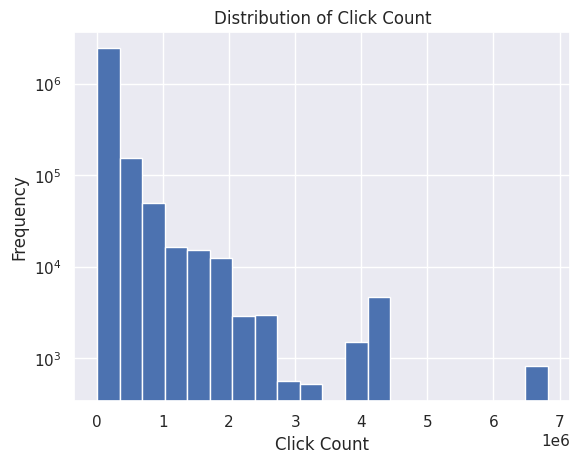

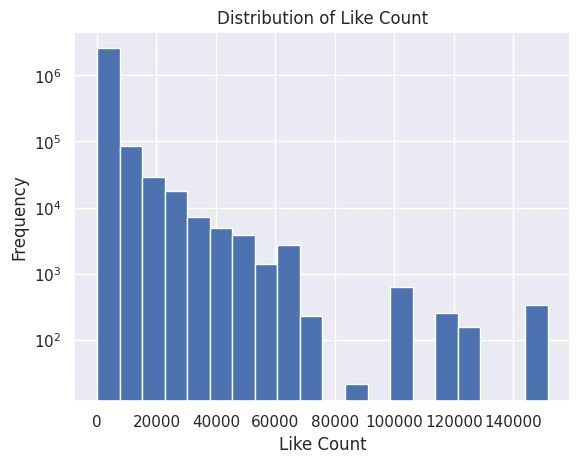

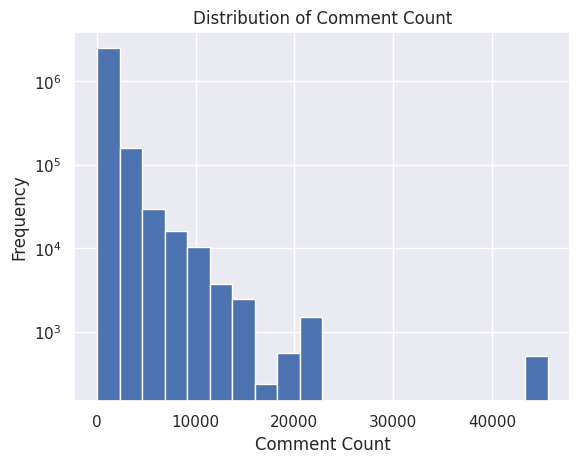

In [139]:
# Create a histogram of click_count
plt.hist(cold_data_03['click_count'], bins=20)
plt.xlabel('Click Count')
plt.ylabel('Frequency')
plt.title('Distribution of Click Count')
plt.yscale('log')
plt.show();

# Create a histogram of like_count
plt.hist(cold_data_03['like_count'], bins=20)
plt.xlabel('Like Count')
plt.ylabel('Frequency')
plt.title('Distribution of Like Count')
plt.yscale('log')
plt.show();

# Create a histogram of comment_count
plt.hist(cold_data_03['comment_count'], bins=20)
plt.xlabel('Comment Count')
plt.ylabel('Frequency')
plt.title('Distribution of Comment Count')
plt.yscale('log')
plt.show();



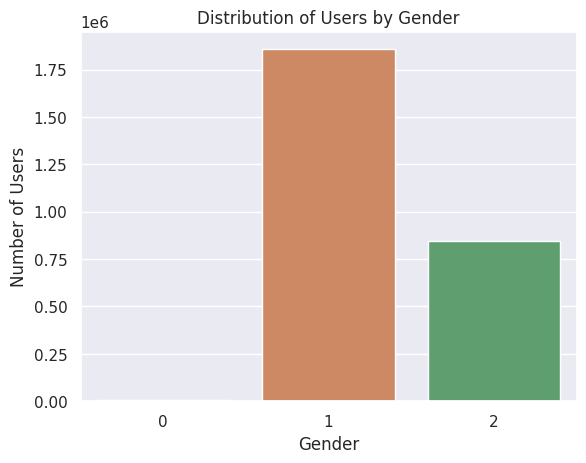

In [140]:
# Create a histogram of the age distribution
sns.countplot(x= 'gender' , data = cold_data_03)
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Gender')
plt.show();

In [141]:
cold_data_03['gender'].value_counts()

1    1857507
2     843782
0       5238
Name: gender, dtype: int64

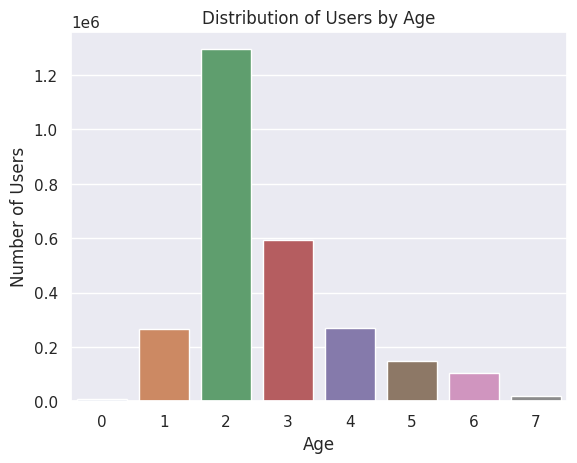

In [142]:
# Create a histogram of the age distribution
sns.countplot(x= 'age' , data = cold_data_03)
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Age')
plt.show();

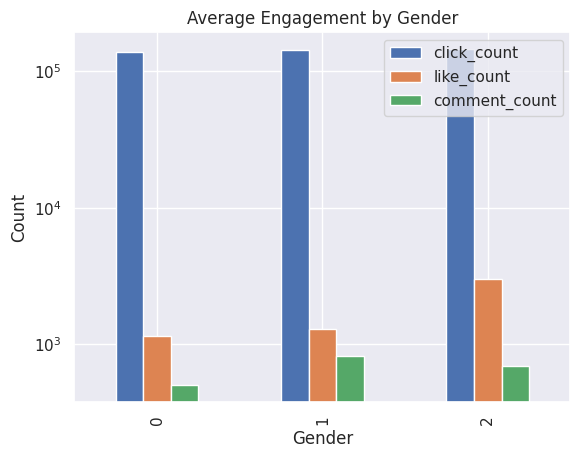

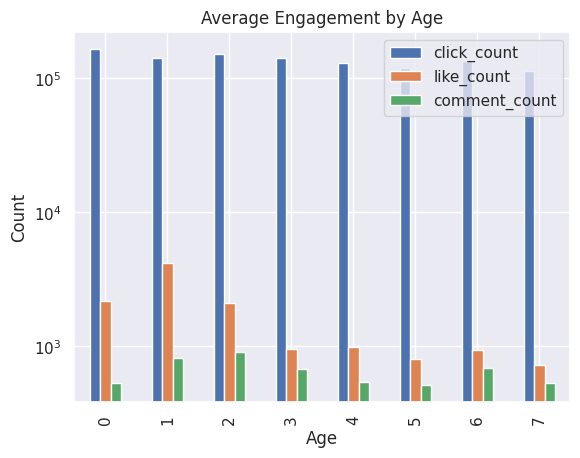

In [158]:
# Create a bar chart of the average click_count, like_count, and comment_count by gender
grouped_df = cold_data_03.groupby('gender')[['click_count', 'like_count', 'comment_count']].mean()
grouped_df.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Average Engagement by Gender')
plt.yscale('log')
plt.show();

# Create a bar chart of the average click_count, like_count, and comment_count by gender
grouped_df = cold_data_03.groupby('age')[['click_count', 'like_count', 'comment_count']].mean()
grouped_df.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Average Engagement by Age')
plt.yscale('log')
plt.show();

In [80]:
# Calculate the frequency of each type of engagement
engagement = cold_data_03[['read', 'share', 'like', 'follow', 'favorite']]
for col in engagement.columns:
  engagement[col] = engagement[col].astype(str)
engagement_freq = engagement.apply(pd.Series.value_counts)


/tmp/ipykernel_9787/2514281951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engagement[col] = engagement[col].astype(str)
/tmp/ipykernel_9787/2514281951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engagement[col] = engagement[col].astype(str)
/tmp/ipykernel_9787/2514281951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

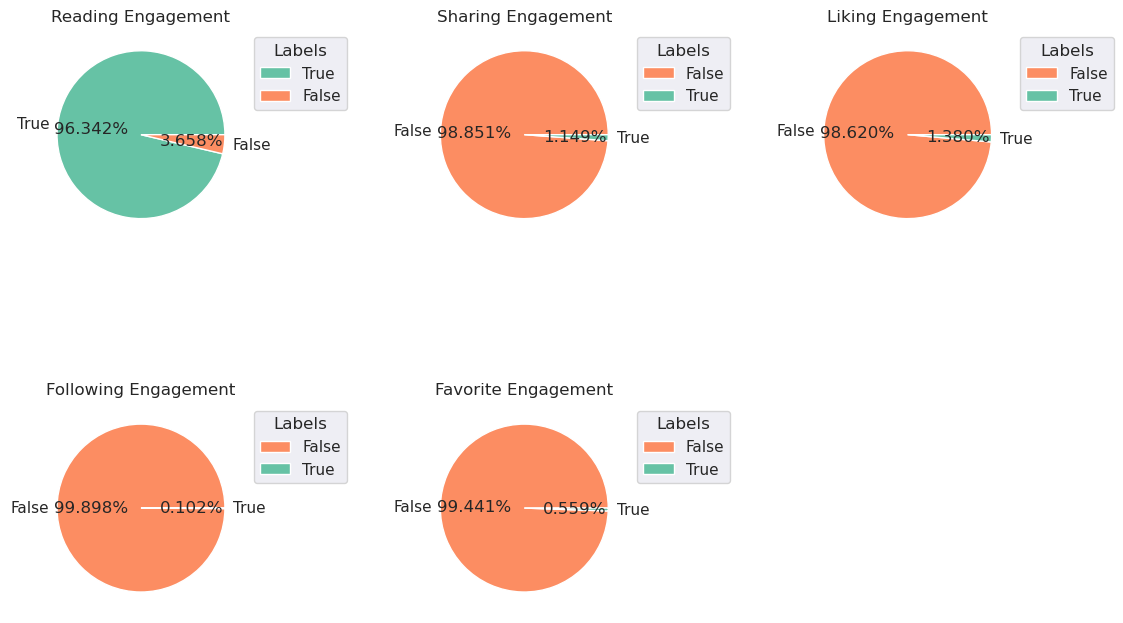

In [81]:
# Define a color dictionary to map each label to a color
color_dict = {'True': '#66c2a5', 'False': '#fc8d62'}

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

axs[0, 0].pie(engagement['read'].value_counts(), labels=engagement['read'].unique(), colors=[color_dict[label] for label in engagement['read'].unique()], autopct='%1.3f%%')
axs[0, 0].set_title("Reading Engagement")
axs[0, 0].legend(title="Labels", labels=engagement['read'].unique(), bbox_to_anchor=(1, 1))

axs[0, 1].pie(engagement['share'].value_counts(), labels=engagement['share'].unique(), colors=[color_dict[label] for label in engagement['share'].unique()], autopct='%1.3f%%')
axs[0, 1].set_title("Sharing Engagement")
axs[0, 1].legend(title="Labels", labels=engagement['share'].unique(), bbox_to_anchor=(1, 1))

axs[0, 2].pie(engagement['like'].value_counts(), labels=engagement['like'].unique(), colors=[color_dict[label] for label in engagement['like'].unique()], autopct='%1.3f%%')
axs[0, 2].set_title("Liking Engagement")
axs[0, 2].legend(title="Labels", labels=engagement['like'].unique(), bbox_to_anchor=(1, 1))

axs[1, 0].pie(engagement['follow'].value_counts(), labels=engagement['follow'].unique(), colors=[color_dict[label] for label in engagement['follow'].unique()], autopct='%1.3f%%')
axs[1, 0].set_title("Following Engagement")
axs[1, 0].legend(title="Labels", labels=engagement['follow'].unique(), bbox_to_anchor=(1, 1))

axs[1, 1].pie(engagement['favorite'].value_counts(), labels=engagement['favorite'].unique(), colors=[color_dict[label] for label in engagement['favorite'].unique()], autopct='%1.3f%%')
axs[1, 1].set_title("Favorite Engagement")
axs[1, 1].legend(title="Labels", labels=engagement['favorite'].unique(), bbox_to_anchor=(1, 1))

axs[1, 2].remove()

# Adjust the layout
fig.tight_layout(pad=3.0)

# Show the plot
plt.show();

As we include more and more hot users in the dataset, we can see that the number of engagers increase, and this is found in the decrease number of only readers, and the increase the engagements in the other types.

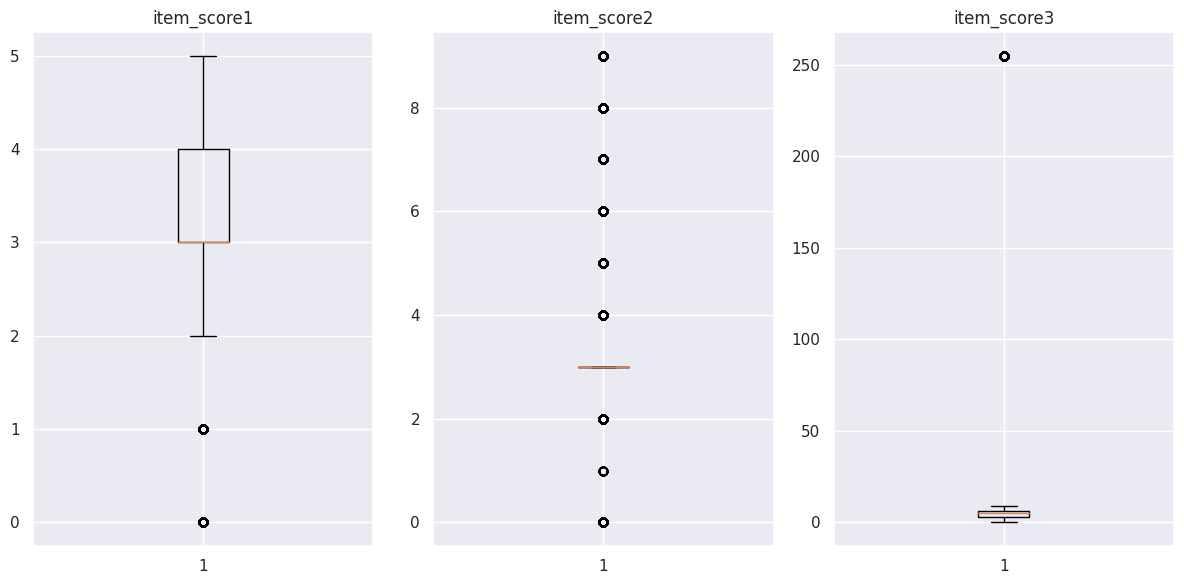

In [148]:
# Create a box plot of item_score1, item_score2, and item_score3
fig, axs = plt.subplots(ncols=3, figsize=(12, 6))
axs[0].boxplot(cold_data_03['item_score1'])
axs[0].set_title('item_score1')
axs[1].boxplot(cold_data_03['item_score2'])
axs[1].set_title('item_score2')
axs[2].boxplot(cold_data_03['item_score3'])
axs[2].set_title('item_score3')

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show();

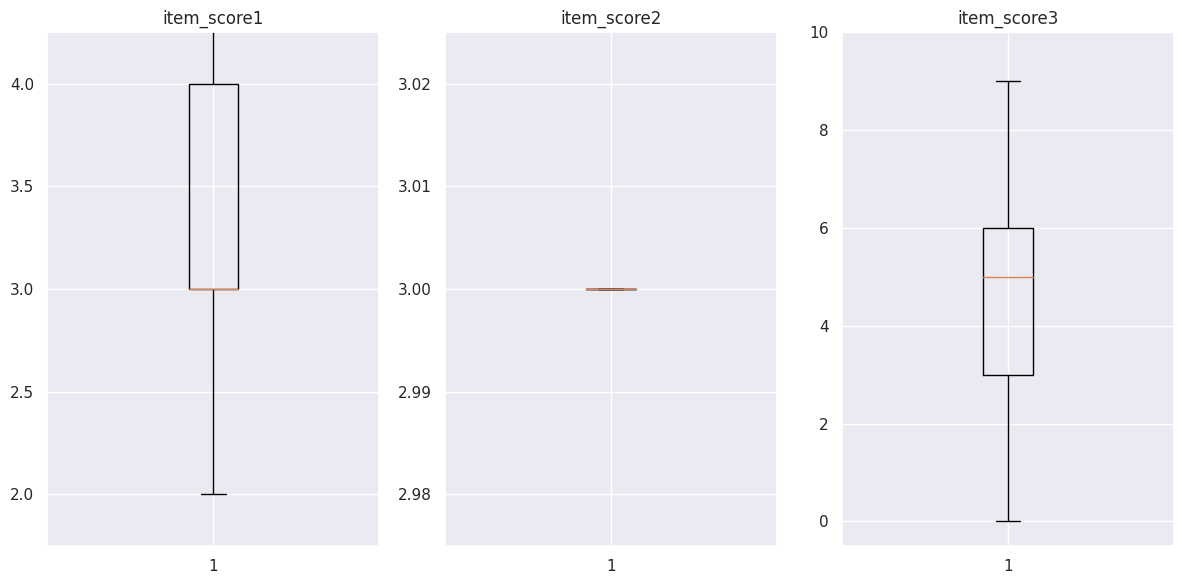

In [149]:
# Focusing on the box itself
# Create a box plot of item_score1, item_score2, and item_score3
fig, axs = plt.subplots(ncols=3, figsize=(12, 6))
axs[0].boxplot(cold_data_03['item_score1'])
axs[0].set_ylim(1.75,4.25)
axs[0].set_title('item_score1')
axs[1].boxplot(cold_data_03['item_score2'])
axs[1].set_ylim(2.975,3.025)
axs[1].set_title('item_score2')
axs[2].boxplot(cold_data_03['item_score3'])
axs[2].set_ylim(-.5, 10)
axs[2].set_title('item_score3')

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show();

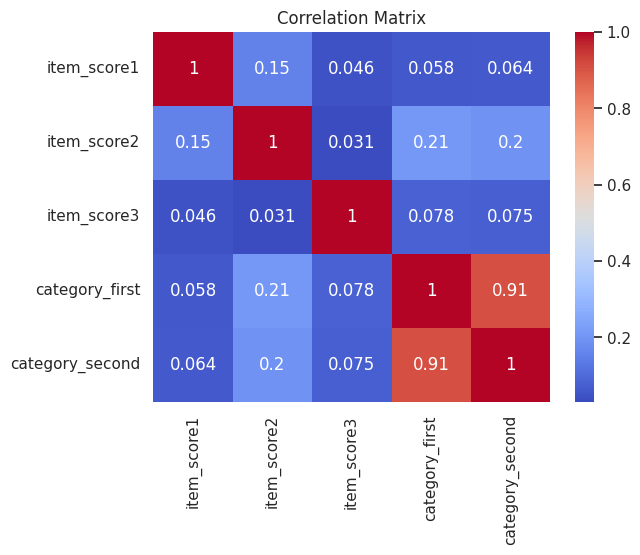

In [150]:
sns.heatmap(cold_data_03[['item_score1', 'item_score2', 'item_score3', 'category_first', 'category_second']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show();

### 5. sbr_data_1M.csv

In [10]:
# Show the first 5 samples of the dataframe
sbr_data_1M.head()

,user_id,item_id,click,follow,like,share,video_category,watching_times,gender,age
0,1,1,1,0,0,0,1,1,1,4
1,1,2,1,0,0,0,1,1,1,4
2,1,3,1,0,0,0,0,1,1,4
3,1,80936,1,0,0,0,1,1,1,4
4,1,781,1,0,0,0,1,1,1,4


In [13]:
# Show the information regarding each column
sbr_data_1M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38300254 entries, 0 to 38300253
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   item_id         int64 
 2   click           int64 
 3   follow          int64 
 4   like            int64 
 5   share           int64 
 6   video_category  object
 7   watching_times  int64 
 8   gender          int64 
 9   age             int64 
dtypes: int64(9), object(1)
memory usage: 2.9+ GB


This data consists of 38.3 million samples with 10 features.

In [14]:
# Statistical description of the dataset
sbr_data_1M.drop(['user_id', 'item_id', 'video_category'], axis=1).describe()

,click,follow,like,share,watching_times,gender,age
count,38300254.000,38300254.000,38300254.000,38300254.000,38300254.000,38300254.000,38300254.000
mean,1.000,0.003,0.040,0.004,1.491,1.025,2.041
std,0.000,0.059,0.196,0.063,2.067,0.640,1.245
min,1.000,0.000,0.000,0.000,1.000,0.000,0.000
25%,1.000,0.000,0.000,0.000,1.000,1.000,2.000
50%,1.000,0.000,0.000,0.000,1.000,1.000,2.000
75%,1.000,0.000,0.000,0.000,2.000,1.000,3.000
max,1.000,1.000,1.000,1.000,1975.000,2.000,7.000


From the description, we can understand the data we are working with more. As the cold start dataset, both gender and age columns are of the same characteristics. For the engagement columns (click, follow, like, share), they are represented in binary.

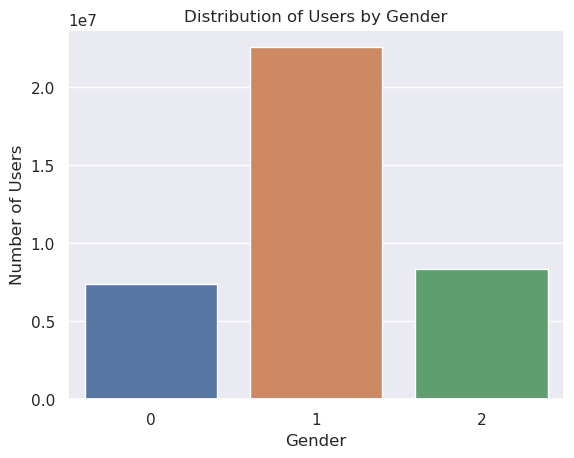

In [16]:
# Create a histogram of the age distribution
sns.countplot(x= 'gender' , data = sbr_data_1M)
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Gender')
plt.show();

Gender *1* holds the largest number of user, whereas the other two are close in their numbers.

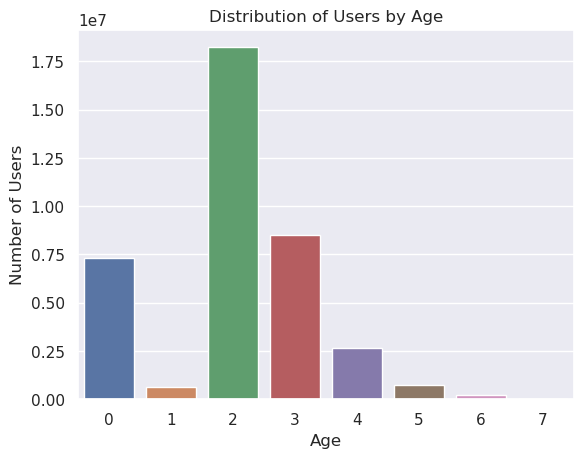

In [17]:
# Create a histogram of the age distribution
sns.countplot(x= 'age' , data = sbr_data_1M)
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Age')
plt.show();

The distribution is very much different from those of the cold start, with age categories *6* and *7* hold the last places respectively instead of category *0*.

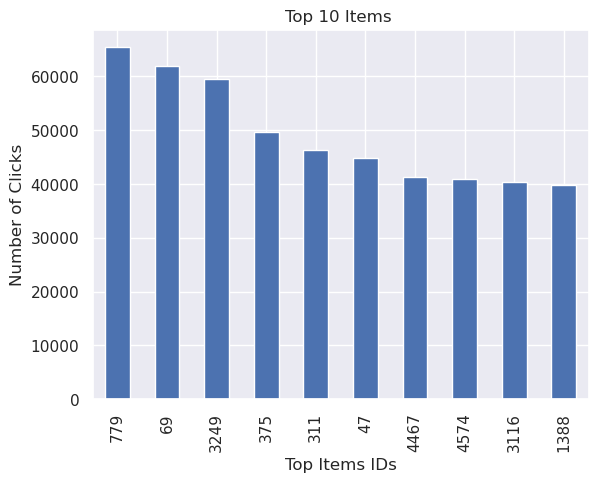

In [82]:
# Calculate the percentage of clicks for each item
click_percentage = sbr_data_1M.groupby('item_id')['click'].sum()
top_items = click_percentage.nlargest(10)

# Plot a histogram of the click percentages
x= top_items.plot(kind='bar' )
x= plt.xlabel('Top Items IDs')
x= plt.ylabel('Number of Clicks')
x= plt.title('Top 10 Items ')
plt.show()

The ID of the item with the most clicks in this "779".

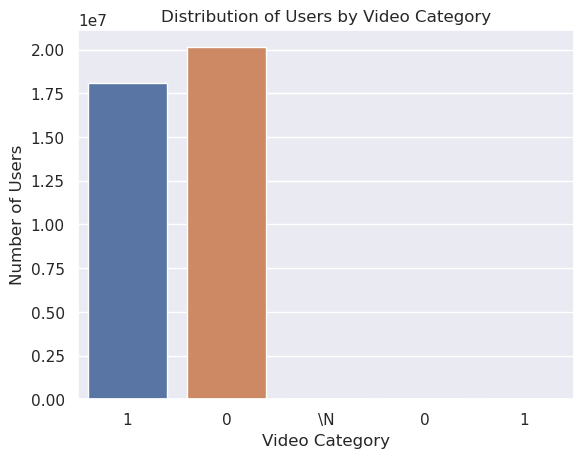

In [84]:
sns.countplot(x= 'video_category' , data = sbr_data_1M)
plt.xlabel('Video Category')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Video Category')
plt.show();

By plotting the video_category column, we find that there are 5 unique columns with 4 of duplicated label: *1* and *'1'*, *0* and *'0'*. 

In [28]:
sbr_data_1M['video_category'].value_counts()

video_category
0     20136154
1     18091440
0        33850
1        31686
\N        7124
Name: count, dtype: int64

In [83]:
# Calculate the frequency of each type of engagement
engagement = sbr_data_1M[['share', 'like', 'follow']]
for col in engagement.columns:
  engagement[col] = engagement[col].astype('str')
engagement_freq = engagement.apply(pd.Series.value_counts)

/tmp/ipykernel_9787/366764329.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engagement[col] = engagement[col].astype('str')
/tmp/ipykernel_9787/366764329.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engagement[col] = engagement[col].astype('str')
/tmp/ipykernel_9787/366764329.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

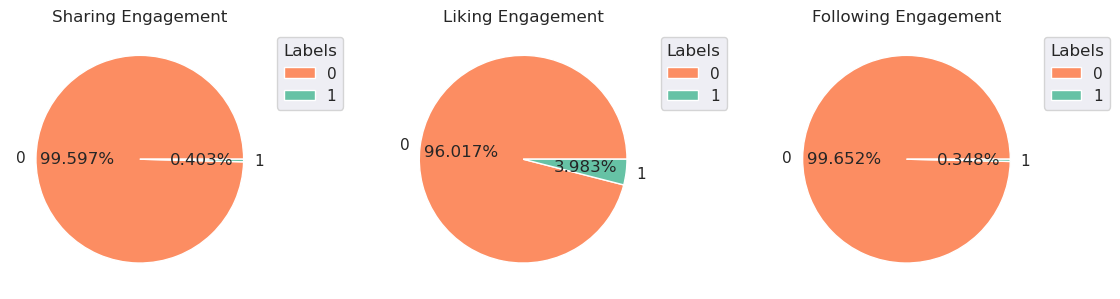

In [36]:
# Define a color dictionary to map each label to a color
color_dict = {1: '#66c2a5', 0: '#fc8d62'}

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

axs[0].pie(engagement['share'].value_counts(), labels=engagement['share'].unique(), colors=[color_dict[label] for label in engagement['share'].unique()], autopct='%1.3f%%')
axs[0].set_title("Sharing Engagement")
axs[0].legend(title="Labels", labels=engagement['share'].unique(), bbox_to_anchor=(1, 1))

axs[1].pie(engagement['like'].value_counts(), labels=engagement['like'].unique(), colors=[color_dict[label] for label in engagement['like'].unique()], autopct='%1.3f%%')
axs[1].set_title("Liking Engagement")
axs[1].legend(title="Labels", labels=engagement['like'].unique(), bbox_to_anchor=(1, 1))

axs[2].pie(engagement['follow'].value_counts(), labels=engagement['follow'].unique(), colors=[color_dict[label] for label in engagement['follow'].unique()], autopct='%1.3f%%')
axs[2].set_title("Following Engagement")
axs[2].legend(title="Labels", labels=engagement['follow'].unique(), bbox_to_anchor=(1, 1))

# Adjust the layout
fig.tight_layout(pad=3.0)

# Show the plot
plt.show();

The engagement with the most positive value (1) is found on the "like".

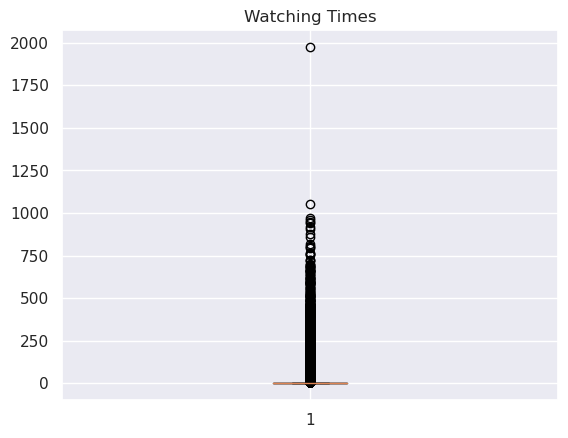

In [49]:
# Focusing on the box itself
plt.boxplot(sbr_data_1M['watching_times'])
plt.title('Watching Times')

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show();

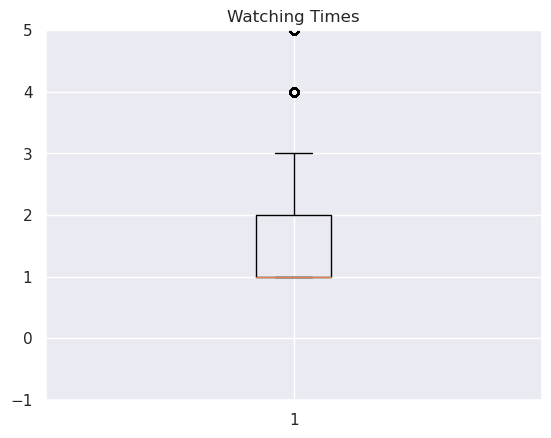

In [50]:
# Focusing on the box itself
plt.boxplot(sbr_data_1M['watching_times'])
plt.ylim(-1,5)
plt.title('Watching Times')

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show();

For the watching_times column:
* Minimum = 1, just like the median and the lower quartile.
* Upper quartile = 2
* Maximum = 3

We can see that there are a lot of outliers. This is because it rearly happens when a user watches a video more than once.